# 一、初识TensorFlow

## 1.1人工智能三学派

本讲目标:学会神经网络计算过程，使用基于TF2原生代码搭建你的第一个的神经网络训练模型

当今人工智能主流方向——连接 主义

- 前向传播
- 损失函数(初体会)
- 梯度下降(初体会)
- 学习率(初体会)
- 反向传播更新参数

人工智能：让机器具备人的思维和意识。

人工智能三学派:

- 行为主义:基于控制论，构建感知-动作控制系统。 (控制论，如平衡、行走、避障等自适应控制系统)
- 符号主义:基于算数逻辑表达式，求解问题时先把问题描述为表达式，再求解表达式。(可用公 式描述、实现理性思维，如专家系统)
- 连接主义:仿生学，模仿神经元连接关系。(仿脑神经元连接，实现感性思维，如神经网络)

理解:基于连结主义的神经网络设计过程

<img src="tensorflow2.assets/image-20200601174933788.png" alt="image-20200601174933788" style="zoom:67%;" />

用计算机仿出神经网络连接关系，让计算机具备感性思维。

- 准备数据:采集大量”特征标签”数据
- 搭建网络:搭建神经网络结构
- 优化参数:训练网络获取最佳参数(反传)
- 应用网络:将网络保存为模型，输入新数据，输出分类或预测结果(前传)

![image-20200508153816354](tensorflow2.assets/image-20200508153816354.png)

## 1.2神经网络设计过程

给鸢尾花分类(lris)

- 0狗尾草鸢尾
- 1杂色鸢尾
- 2弗吉尼亚鸢尾

人们通过经验总结出了规律:通过测量花的花曹长、花尊宽、花瓣长、花瓣宽，可以得出鸢尾花的类别。

(如:花萼长>花尊宽且花瓣长花瓣宽>2则为1杂色鸢尾)

if语句case语句——专家系统，把专家的经验告知计算机，计算机执行逻辑判别(理性计算)，给出分类。

**神经网络**：采集大量(输入特征：花萼长、花夢宽、花瓣长、花瓣宽，标签(需人工 标定)：对应的类别)数据对构成数据集。

把数据集限入搭建好的神经网络结构，网络优化参 数得到模型，模型读入新输入特征，输出识别‘

### 用神经网络实现鸢尾花分类

![image-20200601175024207](tensorflow2.assets/image-20200601175024207.png)

#### 喂入数据

![image-20200601175159359](tensorflow2.assets/image-20200601175159359.png)

#### 前向传播

![image-20200601175118615](tensorflow2.assets/image-20200601175118615.png)

代码示例：


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf

x1 = tf.constant([[5.8, 4.0, 1.2, 0.2]])  # 5.8,4.0,1.2,0.2（0）
w1 = tf.constant([[-0.8, -0.34, -1.4],
                  [0.6, 1.3, 0.25],
                  [0.5, 1.45, 0.9],
                  [0.65, 0.7, -1.2]])
b1 = tf.constant([2.52, -3.1, 5.62])
y = tf.matmul(x1, w1) + b1
print("x1.shape:", x1.shape)
print("w1.shape:", w1.shape)
print("b1.shape:", b1.shape)
print("y.shape:", y.shape)
print("y:", y)

#####以下代码可将输出结果y转化为概率值#####
y_dim = tf.squeeze(y)  # 去掉y中纬度1（观察y_dim与 y 效果对比）
y_pro = tf.nn.softmax(y_dim)  # 使y_dim符合概率分布，输出为概率值了
print("y_dim:", y_dim)
print("y_pro:", y_pro)

#请观察打印出的shape

x1.shape: (1, 4)
w1.shape: (4, 3)
b1.shape: (3,)
y.shape: (1, 3)
y: tf.Tensor([[ 1.0099998   2.008      -0.65999985]], shape=(1, 3), dtype=float32)
y_dim: tf.Tensor([ 1.0099998   2.008      -0.65999985], shape=(3,), dtype=float32)
y_pro: tf.Tensor([0.2563381  0.69540703 0.04825491], shape=(3,), dtype=float32)


2022-01-05 10:16:28.240503: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### 损失函数

![image-20200601175240914](tensorflow2.assets/image-20200601175240914.png)

得出结果为1分类

损失函数(loss function) ：预测值(y)与标准答案(y_ )的差距。

损失函数可以定量判断W、b的优劣，当损失函数输出最小时，参数w、b会出现最优值。

均方误差：
$$
\operatorname{MSE}\left(y, y_{-}\right)=\frac{\sum_{k=0}^{n}(y-y)^{2}}{n}
$$

#### 梯度下降

目的：想找到一组参数w和b,使得损失函数最小。

梯度：函数对各参数求偏导后的向量。函数梯度下降方向是函数减小方向。

梯度下降法：沿损失函数梯度下降的方向，寻找损失函数的最小值，得到最优参数的方法。
$$
\begin{array}{l}
w_{t+1}=w_{t}-l r * \frac{\partial l o s s}{\partial w_{t}} \\
b_{t+1}=b-l r * \frac{\partial l o s s}{\partial b_{t}} \\
w_{t+1} * x+b_{t+1} \rightarrow y
\end{array}
$$
学习率(learning rate, Ir) ：当学习率设置的过小时，收敛过程将变得十分缓慢。而当学习率设置的过大时，梯度可能会在最小值附近来回震荡，甚至可能无法收敛。

![image-20200601175413420](tensorflow2.assets/image-20200601175413420.png)

#### 反向传播

反向传播：从后向前，逐层求损失函数对每层神经元参数的偏导数，迭代更新所有参数。
$$
w_{t+1}=w_{t}-l r * \frac{\partial l o s s}{\partial w_{t}}
$$
例如损失函数为：
$$
\operatorname{loss}=(w+1)^{2}
$$
求偏导
$$
\frac{\partial \operatorname{loss}}{\partial w}=2 w+2
$$
参数w初始化为5，学习率为0.2则

| 次数 | 参数w | 结果                          |
| ---- | ----- | ----------------------------- |
| 1    | 5     | `5-0.2*（2*4+2）=2.6`         |
| 2    | 2.6   | `2.6-0.2*（2*2.6+2）=1.16`    |
| 3    | 1.16  | `1.16-0.2*（2*1.16+2）=0.296` |
| 4    | 0.296 | .......                       |

![image-20200601175508405](tensorflow2.assets/image-20200601175508405.png)

求出w的最佳值，使得损失函数最小，代码示例：

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf

w = tf.Variable(tf.constant(5, dtype=tf.float32))
lr = 0.2
epoch = 40

for i in range(epoch):  # for epoch 定义顶层循环，表示对数据集循环epoch次，此例数据集数据仅有1个w,初始化时候constant赋值为5，循环40次迭代。
    # 用with结构让损失函数loss对参数w求梯度
    with tf.GradientTape() as tape:  # with结构到grads框起了梯度的计算过程。
        loss = tf.square(w + 1)
    grads = tape.gradient(loss, w)  # .gradient函数告知谁对谁求导,此处为loss函数对w求偏导

    w.assign_sub(lr * grads)  # .assign_sub 对变量做自减 即：w -= lr*grads 即 w = w - lr*grads
    print("After %s epoch,w is %f,loss is %f" % (i, w.numpy(), loss))

# lr初始值：0.2   请自改学习率  0.001  0.999 看收敛过程
# 最终目的：找到 loss 最小 即 w = -1 的最优参数w

After 0 epoch,w is 2.600000,loss is 36.000000
After 1 epoch,w is 1.160000,loss is 12.959999
After 2 epoch,w is 0.296000,loss is 4.665599
After 3 epoch,w is -0.222400,loss is 1.679616
After 4 epoch,w is -0.533440,loss is 0.604662
After 5 epoch,w is -0.720064,loss is 0.217678
After 6 epoch,w is -0.832038,loss is 0.078364
After 7 epoch,w is -0.899223,loss is 0.028211
After 8 epoch,w is -0.939534,loss is 0.010156
After 9 epoch,w is -0.963720,loss is 0.003656
After 10 epoch,w is -0.978232,loss is 0.001316
After 11 epoch,w is -0.986939,loss is 0.000474
After 12 epoch,w is -0.992164,loss is 0.000171
After 13 epoch,w is -0.995298,loss is 0.000061
After 14 epoch,w is -0.997179,loss is 0.000022
After 15 epoch,w is -0.998307,loss is 0.000008
After 16 epoch,w is -0.998984,loss is 0.000003
After 17 epoch,w is -0.999391,loss is 0.000001
After 18 epoch,w is -0.999634,loss is 0.000000
After 19 epoch,w is -0.999781,loss is 0.000000
After 20 epoch,w is -0.999868,loss is 0.000000
After 21 epoch,w is -0.9

## 1.3张量生成

张量(Tensor) ：多维数组(列表)

阶：张量的维数

| 维数 | 阶   | 名字        | 例子                              |
| ---- | ---- | ----------- | --------------------------------- |
| 0-D  | 0    | 标量 scalar | s=1 2 3                           |
| 1-D  | 1    | 向量 vector | v=[1, 2, 3]                       |
| 2-D  | 2    | 矩阵 matrix | m=`[[1,2,3],[4,5,6][7,8,9]]`      |
| N-D  | N    | 张量 tensor | t=[[[    有几个中括号就是几阶张量 |

张量可以表示0阶到n阶数组(列表)

### 数据类型

- `tf.int`, `tf.float`
  - `tf.int 32`，`tf.float 32`, `tf.float 64`
- `tf.bool`
  - `tf.constant([True, False])`
- `tf.string`
  - `tf.constant("Hello, world!")`

### 如何创建一个Tensor

**创建一个张量**

```
tf.constant(张量内容, dtype=数据类型（可选）)
```

代码示例

```python
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf

a = tf.constant([1, 5], dtype=tf.int64)
print("a:", a)
print("a.dtype:", a.dtype)
print("a.shape:", a.shape)

# 本机默认 tf.int32  可去掉dtype试一下 查看默认值
```

运行结果

```python
a: tf.Tensor([1 5], shape=(2,), dtype=int32)
a.dtype: <dtype: 'int32'>
a.shape: (2,)
```

将numpy的数据类型转换为Tensor数据类型`tf. convert to_tensor(数据名，dtype=数 据类型(可选))`

In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf
import numpy as np

a = np.arange(0, 5)
b = tf.convert_to_tensor(a, dtype=tf.int64)
print("a:", a)
print("b:", b)

a: [0 1 2 3 4]
b: tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)


- **创建全为0的张量**
  - `tf. zeros(维度)`
- **创建全为1的张量**
  - `tf. ones(维度)`
- **创建全为指定值的张量**
  - `tf. fil(维度，指定值)`

维度：

- 一维直接写个数
- 二维用[行，列]
- 多维用[n,m,.K....]

代码示例：

In [5]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf

a = tf.zeros([2, 3])
b = tf.ones(4)
c = tf.fill([2, 2], 9)
print("a:", a)
print("b:", b)
print("c:", c)

a: tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
b: tf.Tensor([1. 1. 1. 1.], shape=(4,), dtype=float32)
c: tf.Tensor(
[[9 9]
 [9 9]], shape=(2, 2), dtype=int32)


- **生成正态分布的随机数，默认均值为0，标准差为1**
  - `tf. random.normal (维度，mean=均值，stddev=标准差)`
- **生成截断式正态分布的随机数**
  - `tf. random.truncated normal (维度，mean=均值，stddev=标准差)`

在`tf.truncated normal`中如果随机生成数据的取值在(μ-2σ， μ+2σ) 之外,则重新进行生成，保证了生成值在均值附近。(μ:均值，σ:标准差）

标准差计算公式：
$$
\sigma=\sqrt{\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}{n}}
$$
代码示例：


In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf

d = tf.random.normal([2, 2], mean=0.5, stddev=1)
print("d:", d)
e = tf.random.truncated_normal([2, 2], mean=0.5, stddev=1)
print("e:", e)

d: tf.Tensor(
[[ 0.26222605 -0.11321777]
 [ 0.45145872  0.47363323]], shape=(2, 2), dtype=float32)
e: tf.Tensor(
[[ 2.039483   -0.04079282]
 [ 2.0433884  -1.1014012 ]], shape=(2, 2), dtype=float32)


**生成均匀分布随机数( minval, maxval )**
`tf. random. uniform(维度，minval=最小值，maxval=最大值)`

代码示例

In [7]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf

f = tf.random.uniform([2, 2], minval=0, maxval=1)
print("f:", f)

f: tf.Tensor(
[[0.21148717 0.00774872]
 [0.94681394 0.36983073]], shape=(2, 2), dtype=float32)


## 1.4 TF2常用函数

- 强制tensor转换为该数据类型
  - `tf.cast (张量名，dtype=数据类型)`
- 计算张量维度上元素的最小值
  - `tf.reduce_ min (张量名)`
- 计算张量维度上元素的最大值
  - `tf.reduce_ max(张量名)`
- 将tensor转换为numpy
  - `tensor.numpy()`

代码示例：

In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf

x1 = tf.constant([1., 2., 3.], dtype=tf.float64)
print("x1:", x1)
x2 = tf.cast(x1, tf.int32)
print("x2:", x2)
print("minimum of x2：", tf.reduce_min(x2))
print("maxmum of x2:", tf.reduce_max(x2))

a = tf.constant(5, dtype=tf.int64)
print("tensor a:", a)
print("numpy a:", a.numpy())

x1: tf.Tensor([1. 2. 3.], shape=(3,), dtype=float64)
x2: tf.Tensor([1 2 3], shape=(3,), dtype=int32)
minimum of x2： tf.Tensor(1, shape=(), dtype=int32)
maxmum of x2: tf.Tensor(3, shape=(), dtype=int32)
tensor a: tf.Tensor(5, shape=(), dtype=int64)
numpy a: 5


### 理解axis

在一个二维张量或数组中，可以通过调整axis等于0或1控制执行维度。

axis=0代表跨行(经度，down),而axis=1代表跨列(纬度，across)

如果不指定axis,则所有元素参与计算。

![image.png](tensorflow2.assets/image-20200601175653922.png)

- 计算张量沿着指定维度的平均值
  - `tf.reduce_mean (张量名，axis=操作轴)`
- 计算张量沿着指定维度的和
  - `tf.reduce_sum (张量名，axis=操作轴)`

代码示例

In [9]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf

x = tf.constant([[1, 2, 3], [2, 2, 3]])
print("x:", x)
print("mean of x:", tf.reduce_mean(x))  # 求x中所有数的均值
print("sum of x:", tf.reduce_sum(x, axis=1))  # 求每一行的和

x: tf.Tensor(
[[1 2 3]
 [2 2 3]], shape=(2, 3), dtype=int32)
mean of x: tf.Tensor(2, shape=(), dtype=int32)
sum of x: tf.Tensor([6 7], shape=(2,), dtype=int32)


### 变量`tf.Variable`

`tf.Variable ()` 将变量标记为“可训练”，被标记的变量会在反向传播中记录梯度信息。神经网络训练中，常用该函数标记待训练参数。

`tf.Variable(初始值)`

定义变量

```python
w = tf.Variable(tf.random.normal([2, 2], mean=0, stddev=1))
```

### TensorFlow中的数学运算

- 对应元素的四则运算: `tf.add`, `tf.subtract`, `tf.multiply`, `tf.divide`
- 平方、次方与开方: `tf.square`, `tf.pow`, `tf.sqrt`
- 矩阵乘: `tf.matmul`

**对应元素的四则运算**

- 实现两个张量的对应元素相加
  - `tf.add (张量1，张量2)`
- 实现两个张量的对应元素相减
  - `tf.subtract (张量1，张量2)`
- 实现两个张量的对应元素相乘
  - `tf.multiply (张量1,张量2)`
- 实现两个张量的对应元素相除
  - `tf.divide (张量1，张量2)`

注意：只有维度相同的张量才可以做四则运算

代码示例：

In [10]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf

a = tf.ones([1, 3])
b = tf.fill([1, 3], 3.)
print("a:", a)
print("b:", b)
print("a+b:", tf.add(a, b))
print("a-b:", tf.subtract(a, b))
print("a*b:", tf.multiply(a, b))
print("b/a:", tf.divide(b, a))

a: tf.Tensor([[1. 1. 1.]], shape=(1, 3), dtype=float32)
b: tf.Tensor([[3. 3. 3.]], shape=(1, 3), dtype=float32)
a+b: tf.Tensor([[4. 4. 4.]], shape=(1, 3), dtype=float32)
a-b: tf.Tensor([[-2. -2. -2.]], shape=(1, 3), dtype=float32)
a*b: tf.Tensor([[3. 3. 3.]], shape=(1, 3), dtype=float32)
b/a: tf.Tensor([[3. 3. 3.]], shape=(1, 3), dtype=float32)


**平方、次方与开方**

- 计算某个张量的平方
  - `tf.square (张量名)`
- 计算某个张量的n次方
  - `tf.pow (张量名，n次方数)`
- 计算某个张量的开方
  - `tf.sqrt (张量名)`

代码示例：

In [11]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf

a = tf.fill([1, 2], 3.)
print("a:", a)
print("a的次方:", tf.pow(a, 3))
print("a的平方:", tf.square(a))
print("a的开方:", tf.sqrt(a))

a: tf.Tensor([[3. 3.]], shape=(1, 2), dtype=float32)
a的次方: tf.Tensor([[27. 27.]], shape=(1, 2), dtype=float32)
a的平方: tf.Tensor([[9. 9.]], shape=(1, 2), dtype=float32)
a的开方: tf.Tensor([[1.7320508 1.7320508]], shape=(1, 2), dtype=float32)


### 矩阵乘

实现两个矩阵的相乘

`tf.matmul(矩阵1，矩阵2)`

代码示例：

In [12]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf

a = tf.ones([3, 2])
b = tf.fill([2, 3], 3.)
print("a:", a)
print("b:", b)
print("a*b:", tf.matmul(a, b))

a: tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)
b: tf.Tensor(
[[3. 3. 3.]
 [3. 3. 3.]], shape=(2, 3), dtype=float32)
a*b: tf.Tensor(
[[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]], shape=(3, 3), dtype=float32)


### 传入特征与标签

切分传入张量的第一维度， 生成输入特征标签对，构建数据集

`data = tf.data.Dataset.from_tensor_ slices((输入特征，标签))`

(Numpy和Tensor格式都可用该语句读入数据)

代码示例：

In [13]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf

features = tf.constant([12, 23, 10, 17])
labels = tf.constant([0, 1, 1, 0])
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
for element in dataset:
    print(element)

(<tf.Tensor: shape=(), dtype=int32, numpy=12>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=int32, numpy=23>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=10>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=17>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


### 函数对指定参数求导`gradient`

with结构记录计算过程，gradient求 出张量的梯度

```python
with tf.GradientTape() as tape:
若千个计算过程
grad=tape.gradient(函数，对谁求导)
```

代码示例，对函数x^2求x的导数
$$
\frac{\partial w^{2}}{\partial w}=2 w=2^{*} 3.0=6.0
$$


In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf

with tf.GradientTape() as tape:
    x = tf.Variable(tf.constant(3.0))
    y = tf.pow(x, 2)
grad = tape.gradient(y, x)
print(grad)

tf.Tensor(6.0, shape=(), dtype=float32)


### 枚举元素`enumerate`

enumerate是python的内建函数，它可遍历每个元素(如列表、元组或字符串)，

组合为：索引元素，常在for循环中使用。

`enumerate(列表名)`

代码示例：

In [15]:
seq = ['one', 'two', 'three']
for i, element in enumerate(seq):
    print(i, element)

0 one
1 two
2 three


### 独热编码

独热编码(Cone-hot encoding) ：在分类问题中，常用独热码做标签，标记类别: 1表示是，0表示非。

标签为1，独热编码为

| 0狗尾草鸢尾 | 1杂色鸢尾 | 2弗吉尼亚鸢尾 |
| ----------- | --------- | ------------- |
| 0           | 1         | 0             |

`tf.one_ hot()`函数将待转换数据，转换为one-hot形式的数据输出。

`tf.one_ hot (待转换数据，depth=几分类)`

代码示例：

In [16]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息


import tensorflow as tf

classes = 3
labels = tf.constant([1, 0, 2])  # 输入的元素值最小为0，最大为2
output = tf.one_hot(labels, depth=classes)
print("result of labels1:", output)
print("\n")

result of labels1: tf.Tensor(
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)




### 输出符合概率分布（归一化）

`tf.nn.softmax(x)`把一个N*1的向量归一化为（0，1）之间的值，由于其中采用指数运算，使得向量中数值较大的量特征更加明显。
$$
\operatorname{Softmax}\left(y_{i}\right)=\frac{e^{y_{i}}}{\sum_{j=0}^{n} e^{y_{i}}}
$$
`tf.nn.softmax(x)`使输出符合概率分布

当n分类的n个输出(yo, y1...... yn_1)通过`softmax( )`函数，便符合概率分布，所有的值和为1。
$$
\forall x P(X=x) \in[0,1] \text { 且 } \sum_{x} P(X=x)=1
$$

![image-2.png](tensorflow2.assets/image-20200601180611527.png)

代码示例：


In [17]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf

y = tf.constant([1.01, 2.01, -0.66])
y_pro = tf.nn.softmax(y)

print("After softmax, y_pro is:", y_pro)  # y_pro 符合概率分布

print("The sum of y_pro:", tf.reduce_sum(y_pro))  # 通过softmax后，所有概率加起来和为1

After softmax, y_pro is: tf.Tensor([0.25598174 0.69583046 0.04818781], shape=(3,), dtype=float32)
The sum of y_pro: tf.Tensor(1.0, shape=(), dtype=float32)


### 参数自更新

赋值操作，更新参数的值并返回。

调用`assign_ sub`前，先用`tf.Variable`定义变量w为可训练(可自更新)。

`w.assign_ sub (w要自减的内容)`

代码示例：

In [18]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf

x = tf.Variable(4)
x.assign_sub(1)
print("x:", x)  # 4-1=3

x: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>


### 指定维度最大值索引

返回张量沿指定维度最大值的索引

`tf.argmax (张量名,axis=操作轴)`

代码示例：

In [19]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import numpy as np
import tensorflow as tf

test = np.array([[1, 2, 3], [2, 3, 4], [5, 4, 3], [8, 7, 2]])
print("test:\n", test)
print("每一列的最大值的索引：", tf.argmax(test, axis=0))  # 返回每一列最大值的索引
print("每一行的最大值的索引", tf.argmax(test, axis=1))  # 返回每一行最大值的索引

test:
 [[1 2 3]
 [2 3 4]
 [5 4 3]
 [8 7 2]]
每一列的最大值的索引： tf.Tensor([3 3 1], shape=(3,), dtype=int64)
每一行的最大值的索引 tf.Tensor([2 2 0 0], shape=(4,), dtype=int64)


## 1.5鸢尾花数据集读入

**数据集介绍**

共有数据150组，每组包括花尊长、花尊宽、花瓣长、花瓣宽4个输入特征。同时给出了，这组特征对应的鸢尾花 类别。类别包括Setosa Iris (狗尾草鸢尾)，Versicolour lris (杂色鸢尾)，Virginica Iris (弗吉尼亚鸢尾)三类，分别用数字0，1，2表示。

读取数据集代码

```python
from sklearn import datasets
from pandas import DataFrame
import pandas as pd

x_data = datasets.load_iris().data  # .data返回iris数据集所有输入特征
y_data = datasets.load_iris().target  # .target返回iris数据集所有标签
print("x_data from datasets: \n", x_data)
print("y_data from datasets: \n", y_data)

x_data = DataFrame(x_data, columns=['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度']) # 为表格增加行索引（左侧）和列标签（上方）
pd.set_option('display.unicode.east_asian_width', True)  # 设置列名对齐
print("x_data add index: \n", x_data)

x_data['类别'] = y_data  # 新加一列，列标签为‘类别’，数据为y_data
print("x_data add a column: \n", x_data)

#类型维度不确定时，建议用print函数打印出来确认效果
```

## 1.6神经网络实现鸢尾花分类

1. 准备数据
   - 数据集读入
   - 数据集乱序
   - 生成训练集和测试集(即x_ _train/y_ train, x_ test/y_ test)
   - 配成(输入特征，标签)对，每次读入一小撮(batch)
2. 搭建网络
   - 定义神经网路中所有可训练参数
3. 参数优化
   - 嵌套循环迭代，with结构更新参数，显示当前loss
4. 测试效果
   - 计算当前参数前向传播后的准确率，显示当前acc
5. acc / loss可视化

代码示例：
```python
# -*- coding: UTF-8 -*-
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

# 训练部分
for epoch in range(epoch):  #数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  
        #batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  
            # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  
            # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  
            # 采用均方误差损失函数mse = mean(sum(y_ - y)^2)
            loss_all += loss.numpy()  
            # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b自更新

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.yls abel('Ac sc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()
```

 # 二、深入TensorFlow
 ## 预备知识

### `tf.where()`

条件语句真返回A,条件语句假返回B

``tf.where(条件语句，真返回A，假返回B)``

代码示例

In [20]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息
import tensorflow as tf

In [21]:
a = tf.constant([1, 2, 3, 1, 1])
b = tf.constant([0, 1, 3, 4, 5])

# 若a>b，返回a对应位置的元素，否则返回b对应位置的元素
c = tf.where(tf.greater(a,b),a,b)
print("c：", c)

c： tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


### `np.random.RandomState.rand()`
返回一个[0,1)之间的随机数
```python
np.random.RandomState.rand(维度)  # 若维度为空，返回标量
```

In [22]:
import numpy as np

rdm = np.random.RandomState(seed=1)
a = rdm.rand()
b = rdm.rand(2,3)

print("a:",a)
print("b:", b)

a: 0.417022004702574
b: [[7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02 1.86260211e-01]]


### `np.vstack()`

将两个数组按垂直方向叠加

```python
np.vstack(数组1,数组2)
```

代码示例：

In [23]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.vstack((a, b))
print("c:\n", c)

c:
 [[1 2 3]
 [4 5 6]]


### 生成网格坐标点

- `np.mgrid[ ]`
  - `np.mgrid[起始值:结束值:步长，起始值:结束值:步长，... ]`
  - [起始值，结束值)，区间左闭右开
- `x.ravel()`将x变为一维数组，“把.前变量拉直”
- `np.c_[]` 使返回的间隔数值点配对
  - `np.c_ [数组1，数组2，... ]`

代码示例：

In [24]:
import numpy as np
# import tensorflow as tf

# 生成等间隔数值点
x, y = np.mgrid[1:3:1, 2:4:0.5]
# 将x, y拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[x.ravel(), y.ravel()]
print("x:\n", x)
print("y:\n", y)
print("x.ravel():\n", x.ravel())
print("y.ravel():\n", y.ravel())
print('grid:\n', grid)

x:
 [[1. 1. 1. 1.]
 [2. 2. 2. 2.]]
y:
 [[2.  2.5 3.  3.5]
 [2.  2.5 3.  3.5]]
x.ravel():
 [1. 1. 1. 1. 2. 2. 2. 2.]
y.ravel():
 [2.  2.5 3.  3.5 2.  2.5 3.  3.5]
grid:
 [[1.  2. ]
 [1.  2.5]
 [1.  3. ]
 [1.  3.5]
 [2.  2. ]
 [2.  2.5]
 [2.  3. ]
 [2.  3.5]]


`np.mgrid[起始值:结束值:步长，起始值:结束值:步长]`填入两个值，相当于构建了一个二维坐标，横坐标值为第一个参数，纵坐标值为第二个参数。

例如，横坐标值为[1, 2, 3]，纵坐标为[2, 2.5, 3, 3.5]

In [25]:
x, y = np.mgrid[1:5:1, 2:4:0.5]
print("x:\n", x)
print("y:\n", y)

x:
 [[1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]]
y:
 [[2.  2.5 3.  3.5]
 [2.  2.5 3.  3.5]
 [2.  2.5 3.  3.5]
 [2.  2.5 3.  3.5]]


## 复杂度和学习率

### 神经网络复杂度

![image.png](tensorflow2.assets/image-20200601183556407.png)

NN复杂度：多用NN层数和NN参数的个数表示

**空间复杂度:**

层数=隐藏层的层数+ 1个输出层

图中为：2层NN

总参数=总w+总b

第1层：3x4+4

第2层：4x2+2

图中共计：3x4+4 +4x2+2 = 26

**时间复杂度:**

乘加运算次数

第1层：3x4

第2层：4x2

图中共计：3x4 + 4x2 = 20

### 学习率

$$
w_{t+1}=w_{t}-l r * \frac{\partial l o s s}{\partial w_{t}}
$$

参数说明

- 更新后的参数
- 当前参数
- 学习率
- 损失函数的梯度（偏导数）

**指数衰减学习率**

可以先用较大的学习率，快速得到较优解，然后逐步减小学习率，使模型在训练后期稳定。

**指数衰减学习率 = 初始学习率 * 学习率衰减率(当前轮数/多少轮衰减一次)**


代码示例

In [26]:
w = tf.Variable(tf.constant(5,dtype=tf.float32))

epoch = 40
LR_BASE = 0.2  # 最初学习率
LR_DECAY = 0.99  # 学习率衰减率
LR_STEP = 1  # 喂入多少轮BATCH_SIZE后，更新一次学习率

for epoch in range(epoch):
    # for epoch 定义顶层循环，表示对数据集循环epoch次，此例数据集数据仅有1个w,初始化时候constant赋值为5，循环40次迭代。
    lr = LR_BASE * LR_DECAY ** (epoch/LR_STEP) # 0.99 的 0 次方为1，此时学习率最大，随着次方的增多，学习率逐渐减小
    with tf.GradientTape() as tape:
        loss = tf.square(w+1)
    grads = tape.gradient(loss,w)
    w.assign_sub(lr*grads)
    print("After %s epoch,w is %f,loss is %f,lr is %f" % (epoch, w.numpy(), loss, lr))

After 0 epoch,w is 2.600000,loss is 36.000000,lr is 0.200000
After 1 epoch,w is 1.174400,loss is 12.959999,lr is 0.198000
After 2 epoch,w is 0.321948,loss is 4.728015,lr is 0.196020
After 3 epoch,w is -0.191126,loss is 1.747547,lr is 0.194060
After 4 epoch,w is -0.501926,loss is 0.654277,lr is 0.192119
After 5 epoch,w is -0.691392,loss is 0.248077,lr is 0.190198
After 6 epoch,w is -0.807611,loss is 0.095239,lr is 0.188296
After 7 epoch,w is -0.879339,loss is 0.037014,lr is 0.186413
After 8 epoch,w is -0.923874,loss is 0.014559,lr is 0.184549
After 9 epoch,w is -0.951691,loss is 0.005795,lr is 0.182703
After 10 epoch,w is -0.969167,loss is 0.002334,lr is 0.180876
After 11 epoch,w is -0.980209,loss is 0.000951,lr is 0.179068
After 12 epoch,w is -0.987226,loss is 0.000392,lr is 0.177277
After 13 epoch,w is -0.991710,loss is 0.000163,lr is 0.175504
After 14 epoch,w is -0.994591,loss is 0.000069,lr is 0.173749
After 15 epoch,w is -0.996452,loss is 0.000029,lr is 0.172012
After 16 epoch,w is

## 激活函数

为什么要用激活函数：在神经网络中，如果不对上一层结点的输出做非线性转换的话，再深的网络也是线性模型，只能把输入线性组合再输出，不能学习到复杂的映射关系，因此需要使用激活函数这个非线性函数做转换。

参考：https://www.cnblogs.com/itmorn/p/11132494.html

### Sigmoid函数

$$
\begin{aligned}
&\operatorname{sigmod}(x)=\frac{1}{1+e^{-x}} \in(0,1)\\
&\operatorname{sigmod}^{\prime}(x)=\operatorname{sigmod}(x)^{*}(1-\operatorname{sigmod}(x))=\frac{1}{1+e^{-x}} * \frac{e^{-x}}{1+e^{-x}}=\frac{e^{-x}}{\left(1+e^{-x}\right)^{2}} \in(0,0.25)
\end{aligned}
$$

```python
tf.nn.sigmoid(x)
```

sigmoid函数图像


![image.png](tensorflow2.assets/sigmoid.jpg)

sigmoid导数图像

![image-2.png](tensorflow2.assets/sigmoid_derivative.jpg)

目前使用sigmoid函数为激活函数的神经网络已经很少了

特点

(1)易造成梯度消失

​ 深层神经网络更新参数时，需要从输入层到输出层，逐层进行链式求导，而sigmoid函数的导数输出为``[0,0.25]``间的小数，链式求导需要多层导数连续相乘，这样会出现多个``[0,0.25]``间的小数连续相乘，从而造成结果趋于 0，产生梯度消失，使得参数无法继续更新。

(2)输出非0均值，收敛慢

​ 希望输入每层神经网络的特征是以0为均值的小数值，但sigmoid函数激活后的数据都时整数，使得收敛变慢。

(3)幂运算复杂，训练时间长

​ sigmoid函数存在幂运算，计算复杂度大。

### Tanh函数

$$
\begin{array}{l}
\tanh (x)=\frac{1-e^{-2 x}}{1+e^{-2 x}} \in(-1,1) \\
\tanh ^{\prime}(x)=1-(\tanh (x))^{2}=\frac{4 e^{-2 x}}{\left(1+e^{-2 x}\right)^{2}} \in(0,1]
\end{array}
$$

```python
tf.math.tanh(x)
```
![image-3.png](tensorflow2.assets/Tanh.png)



**特点**

(1)输出是0均值

(2)易造成梯度消失

(3)幂运算复杂，训练时间长

### Relu函数

$$
\begin{array}{l}
r e l u(x)=\max (x, 0)=\left\{\begin{array}{l}
x, \quad x \geq 0 \\
0, \quad x<0
\end{array} \in[0,+\infty)\right. \\
r e l u^{\prime}(x)=\left\{\begin{array}{ll}
1, & x \geq 0 \\
0, & x<0
\end{array} \in\{0,1\}\right.
\end{array}
$$

```
tf.nn.relu(x)
```


![image-4.png](tensorflow2.assets/relu.png)

**优点:**

1. 解决了梯度消失问题(在正区间)
2. 只 需判断输入是否大于0，计算速度快
3. 收敛速度远快于sigmoid和tanh

**缺点:**

1. 输出非0均值，收敛慢
2. Dead ReIU问题:某些神经元可能永远不会被激活，导致相应的参数永远不能被更新。



### Leaky Relu函数

$$
\begin{aligned}
&\text { LeakyReLU }(x)=\left\{\begin{array}{ll}
x, & x \geq 0 \\
a x, & x<0
\end{array} \in R\right.\\
&\text { LeakyReL } U^{\prime}(x)=\left\{\begin{array}{ll}
1, & x \geq 0 \\
a, & x<0
\end{array} \in\{a, 1\}\right.
\end{aligned}
$$

```python
tf.nn.leaky_relu(x)
```

![image-5.png](tensorflow2.assets/Leaky_Relu.png)

理论上来讲，Leaky Relu有Relu的所有优点，外加不会有Dead Relu问题，但是在实际操作当中，并没有完全证明Leaky Relu总是好于Relu。

### 总结

- 首选relu激活函数;
- 学习率设置较小值;
- 输入特征标准化，即让输入特征满足以0为均值，1为标准差的正态分布;
- 初始参数中心化，即让随机生成的参数满足以0为均值，下式为标准差的正态分布

$$
\sqrt{\frac{2}{\text { 当前层输入特征个数 }}}
$$

## 损失函数

损失函数(loss) ：预测值(y) 与已知答案(y_) 的差距

NN 优化目标：loss最小，有三种方法

- MES (Mean Squared Error)
- 自定义
- CE (Cross Entropy)

### 均方误差mes

$$
\operatorname{MSE}\left(y_{-}, y\right)=\frac{\sum_{i=1}^{n}\left(y-y_{-}\right)^{2}}{n}
$$

```
loss_mse = tf.reduce_mean(tf.square(y_ - y))
```

预测酸奶日销量 y, x1、 x2 是影响日销量的因素。

建模前，应预先采集的数据有:每日 x1、x2 和销量 y_ (即已知答案，最佳情况:产量 = 销量)

拟造数据集 X, Y_ : y_ =x1 + x2，噪声: -0.05~ +0.05

拟合可以预测销量的函数

代码示例

In [27]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf
import numpy as np

SEED = 23455

rdm = np.random.RandomState(seed=SEED)  # 生成[0,1)之间的随机数
x = rdm.rand(32, 2)
y_ = [[x1 + x2 + (rdm.rand() / 10.0 - 0.05)] for (x1, x2) in x]  # 生成噪声[0,1)/10=[0,0.1); [0,0.1)-0.05=[-0.05,0.05)
x = tf.cast(x, dtype=tf.float32)

w1 = tf.Variable(tf.random.normal([2, 1], stddev=1, seed=1))

epoch = 15000
lr = 0.002

for epoch in range(epoch):
    with tf.GradientTape() as tape:
        y = tf.matmul(x, w1)
        loss_mse = tf.reduce_mean(tf.square(y_ - y))

    grads = tape.gradient(loss_mse, w1)
    w1.assign_sub(lr * grads)

    if epoch % 2000 == 0:
        print("After %d training steps,w1 is " % (epoch))
        print(w1.numpy(), "\n")
print("Final w1 is: ", w1.numpy())

After 0 training steps,w1 is 
[[-0.8096241]
 [ 1.4855157]] 

After 500 training steps,w1 is 
[[-0.21934733]
 [ 1.6984866 ]] 

After 1000 training steps,w1 is 
[[0.0893971]
 [1.673225 ]] 

After 1500 training steps,w1 is 
[[0.28368822]
 [1.5853055 ]] 

After 2000 training steps,w1 is 
[[0.423243 ]
 [1.4906037]] 

After 2500 training steps,w1 is 
[[0.531055 ]
 [1.4053345]] 

After 3000 training steps,w1 is 
[[0.61725086]
 [1.332841  ]] 

After 3500 training steps,w1 is 
[[0.687201 ]
 [1.2725208]] 

After 4000 training steps,w1 is 
[[0.7443262]
 [1.2227542]] 

After 4500 training steps,w1 is 
[[0.7910986]
 [1.1818361]] 

After 5000 training steps,w1 is 
[[0.82943517]
 [1.1482395 ]] 

After 5500 training steps,w1 is 
[[0.860872 ]
 [1.1206709]] 

After 6000 training steps,w1 is 
[[0.88665503]
 [1.098054  ]] 

After 6500 training steps,w1 is 
[[0.90780276]
 [1.0795006 ]] 

After 7000 training steps,w1 is 
[[0.92514884]
 [1.0642821 ]] 

After 7500 training steps,w1 is 
[[0.93937725]
 [1.05179

### 自定义损失函数

如预测商品销量，预测多了，损失成本;预测少了，损失利润

若利润≠成本，则mse产生的loss无法利益最大化。

自定义损失函数，y_：标准答案数据集的，y：预测答案计算出的
$$
\operatorname{loss}\left(y_{-} y\right)=\sum_{n} f\left(y_， y\right)
$$

$$
f\left(y_{-}, y\right)=\left\{\begin{array}{lll}\text { PROFIT* }\left(y_{-}-y\right) & y<y_{-} & \text {预测的 } y\text { 少了, 损失利高(PROFIT) } \\ \text { COST } *\left(y-y_{-}\right) & y>=y_{-} & \text {预测的 } y \text { 多了，损失成本(COST) }\end{array}\right.
$$

如:预测酸奶销量，酸奶成本(COST) 1元，酸奶利润(PROFIT) 99元。

预测少了损失利润99元，大于预测多了损失成本1元。预测少了损失大，希望生成的预测函数往多了预测。

则损失函数为

```python
loss = tf.reduce_sum(tf.where(tf.greater(y, y_), (y - y_) * COST, (y_ - y) * PROFIT))
```

代码示例

In [28]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

import tensorflow as tf
import numpy as np

SEED = 23455
COST = 1
PROFIT = 99

rdm = np.random.RandomState(SEED)
x = rdm.rand(32, 2)
y_ = [[x1 + x2 + (rdm.rand() / 10.0 - 0.05)] for (x1, x2) in x]  # 生成噪声[0,1)/10=[0,0.1); [0,0.1)-0.05=[-0.05,0.05)
x = tf.cast(x, dtype=tf.float32)

w1 = tf.Variable(tf.random.normal([2, 1], stddev=1, seed=1))

epoch = 10000
lr = 0.002

for epoch in range(epoch):
    with tf.GradientTape() as tape:
        y = tf.matmul(x, w1)
        loss = tf.reduce_sum(tf.where(tf.greater(y, y_), (y - y_) * COST, (y_ - y) * PROFIT))

    grads = tape.gradient(loss, w1)
    w1.assign_sub(lr * grads)

    if epoch % 500 == 0:
        print("After %d training steps,w1 is " % (epoch))
        print(w1.numpy(), "\n")
print("Final w1 is: ", w1.numpy())

After 0 training steps,w1 is 
[[2.8786578]
 [3.2517848]] 

After 500 training steps,w1 is 
[[1.1460369]
 [1.0672572]] 

After 1000 training steps,w1 is 
[[1.1364173]
 [1.0985414]] 

After 1500 training steps,w1 is 
[[1.1267972]
 [1.1298251]] 

After 2000 training steps,w1 is 
[[1.1758107]
 [1.1724023]] 

After 2500 training steps,w1 is 
[[1.1453722]
 [1.0272155]] 

After 3000 training steps,w1 is 
[[1.1357522]
 [1.0584993]] 

After 3500 training steps,w1 is 
[[1.1261321]
 [1.0897831]] 

After 4000 training steps,w1 is 
[[1.1751455]
 [1.1323601]] 

After 4500 training steps,w1 is 
[[1.1655253]
 [1.1636437]] 

After 5000 training steps,w1 is 
[[1.1350871]
 [1.0184573]] 

After 5500 training steps,w1 is 
[[1.1254673]
 [1.0497413]] 

After 6000 training steps,w1 is 
[[1.1158477]
 [1.0810255]] 

After 6500 training steps,w1 is 
[[1.1062276]
 [1.1123092]] 

After 7000 training steps,w1 is 
[[1.1552413]
 [1.1548865]] 

After 7500 training steps,w1 is 
[[1.1248026]
 [1.0096996]] 

After 8000 t

自定义损失函数，酸奶成本1元， 酸奶利润99元，成本很低，利润很高，人们希望多预测些，生成模型系数大于1，往多了预测。运行结果
```python
......
After 9000 training steps,w1 is 
[[1.1707956]
 [1.0338644]] 

After 9500 training steps,w1 is 
[[1.1611756]
 [1.0651482]] 

Final w1 is:  [[1.1626335]
 [1.1191947]]
```

自定义损失函数，酸奶成本99元， 酸奶利润1元，成本很高，利润很低，人们希望多少预测，生成模型系数小于1，往少了预测。运行结果

```python
......
After 9000 training steps,w1 is 
[[0.8042901]
 [0.7632218]] 

After 9500 training steps,w1 is 
[[0.8998995 ]
 [0.82509875]] 

Final w1 is:  [[0.9205433]
 [0.9186459]]
```

### 交叉熵损失函数

交义熵损失函数CE (Cross Entropy)：表征两个概率分布之间的距离
$$
\mathrm{H}\left(\mathrm{y}_{-}, \mathrm{y}\right)=-\sum y_{-} * \ln y
$$
eg.二分类已知答案y_ =(1, 0)，预测y1=(0.6, 0.4) y2=(0.8, 0.2)哪个更接近标准答案?
$$
\begin{aligned}
&\mathrm{H}_{1}((1,0),(0.6,0.4))=-(1 * \ln 0.6+0 * \ln 0.4) \approx-(-0.511+0)=0.511\\
&\mathrm{H}_{2}((1,0),(0.8,0.2))=-(1 * \ln 0.8+0 * \ln 0.2) \approx-(-0.223+0)=0.223
\end{aligned}
$$
因为H> H2，所以y2预测更准

```python
tf.losses.categorical_crossentropy(y_ ，y)
```

代码示例



In [29]:
import tensorflow as tf

loss_ce1 = tf.losses.categorical_crossentropy([1, 0], [0.6, 0.4])
loss_ce2 = tf.losses.categorical_crossentropy([1, 0], [0.8, 0.2])
print("loss_ce1:", loss_ce1)
print("loss_ce2:", loss_ce2)

loss_ce1: tf.Tensor(0.5108256, shape=(), dtype=float32)
loss_ce2: tf.Tensor(0.22314353, shape=(), dtype=float32)


### 交叉熵损失函数与softmax结合

输出先过softmax函数，再计算y与y_ 的交叉熵损失函数。

`
tf.nn.softmax_cross_entropy_with_logits(y_, y)
`

代码示例

In [30]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 关闭log信息

# softmax与交叉熵损失函数的结合
import tensorflow as tf
import numpy as np

y_ = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0]])
y = np.array([[12, 3, 2], [3, 10, 1], [1, 2, 5], [4, 6.5, 1.2], [3, 6, 1]])
y_pro = tf.nn.softmax(y)
loss_ce1 = tf.losses.categorical_crossentropy(y_,y_pro)
loss_ce2 = tf.nn.softmax_cross_entropy_with_logits(y_, y)

print('分步计算的结果:\n', loss_ce1)
print('结合计算的结果:\n', loss_ce2)


# 输出的结果相同

分步计算的结果:
 tf.Tensor(
[1.68795487e-04 1.03475622e-03 6.58839038e-02 2.58349207e+00
 5.49852354e-02], shape=(5,), dtype=float64)
结合计算的结果:
 tf.Tensor(
[1.68795487e-04 1.03475622e-03 6.58839038e-02 2.58349207e+00
 5.49852354e-02], shape=(5,), dtype=float64)


## 过拟合与欠拟合
![image.png](tensorflow2.assets/fitting.png)
欠拟合的解决方法:

- 增加输入特征项
- 增加网络参数
- 减少正则化参数

过拟合的解决方法:

- 数据清洗
- 增大训练集
- 采用正则化
- 增大正则化参数

### 正则化缓解过拟合

正则化在损失函数中引入模型复杂度指标，利用给W加权值，弱化了训练数据的噪声(一般不正则化b)
$$
\operatorname{loss}=\operatorname{loss}\left(\mathrm{y}与{y}_{-}\right)+\mathrm{REGULARIZER}{*} \operatorname{loss}(\mathrm{w})
$$
式中含义：

`loss(y与y_)`：模型中所有参数的损失函数。如:交叉熵、均方误差

`REGULARIZER`：用超参数REGULARIZER给出参数w在总loss中的比例，即正则化的权重

`loss(w)`：需要正则化的参数。计算方式有两种
$$
\operatorname{loss}_{L_{1}}(w)=\sum_{i}\left|w_{i}\right|
$$

$$
\operatorname{loss}_{L 2}(w)=\sum_{i}\left|w_{i}^{2}\right|
$$

正则化的选择

- L1正则化大概率会使很多参数变为零，因此该方法可通过稀疏参数，即减少参数的数量，降低复杂度。
- L2正则化会使参数很接近零但不为零，因此该方法可通过减小参数值的大小降低复杂度。
  - `tf.nn.l2_loss(w)`

代码示例，未采用正则化`p29_regularizationfree.py`



epoch: 0 loss: 1.0614380836486816
epoch: 20 loss: 0.033295951783657074
epoch: 40 loss: 0.025678714737296104
epoch: 60 loss: 0.02432611584663391
epoch: 80 loss: 0.023531636223196983
epoch: 100 loss: 0.022891918197274208
epoch: 120 loss: 0.022389540448784828
epoch: 140 loss: 0.02193456143140793
epoch: 160 loss: 0.021660005673766136
epoch: 180 loss: 0.021494975313544273
epoch: 200 loss: 0.021231085062026978
epoch: 220 loss: 0.020932571962475777
epoch: 240 loss: 0.020656654611229897
epoch: 260 loss: 0.020433800294995308
epoch: 280 loss: 0.020250950008630753
epoch: 300 loss: 0.01987382210791111
epoch: 320 loss: 0.019301550462841988
epoch: 340 loss: 0.018754366785287857
epoch: 360 loss: 0.01797657459974289
epoch: 380 loss: 0.017480889335274696
*******predict*******


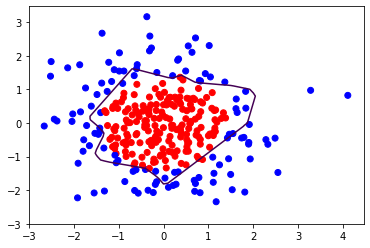

In [31]:
# 导入所需模块
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# 读入数据/标签 生成x_train y_train
df = pd.read_csv('data/dot.csv')
x_data = np.array(df[['x1', 'x2']])
y_data = np.array(df['y_c'])

# reshape(-1,x) -1是将一维数组转换为二维的矩阵，并且第二个参数是表示分成几列，
# 但是在reshape的时候必须让数组里面的个数和shape的函数做取余时值为零才能转换
x_train = np.vstack(x_data).reshape(-1,2)
y_train = np.vstack(y_data).reshape(-1,1)  #将y_data转换为二维数组


Y_c = [['red' if y else 'blue'] for y in y_train]  # 三元运算

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型问题报错
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

# from_tensor_slices函数切分传入的张量的第一个维度，生成相应的数据集，使输入特征和标签值一一对应
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

# 生成神经网络的参数，输入层为2个神经元，隐藏层为11个神经元，1层隐藏层，输出层为1个神经元
# 隐藏层11个神经元为人为指定
# 用tf.Variable()保证参数可训练
w1 = tf.Variable(tf.random.normal([2, 11]), dtype=tf.float32)  # 隐藏层2个输入，11个输出
b1 = tf.Variable(tf.constant(0.01, shape=[11]))  # b的个数与w个数相同

w2 = tf.Variable(tf.random.normal([11, 1]), dtype=tf.float32)  # 输出层接收11个，输出1个
b2 = tf.Variable(tf.constant(0.01, shape=[1]))

lr = 0.01  # 学习率
epoch = 400  # 循环轮数

# 训练部分
for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:  # 记录梯度信息

            h1 = tf.matmul(x_train, w1) + b1  # 记录神经网络乘加运算
            h1 = tf.nn.relu(h1)  # relu激活函数
            y = tf.matmul(h1, w2) + b2

            # 采用均方误差损失函数 mse = mean(sum(y-out)^2)
            loss = tf.reduce_mean(tf.square(y_train - y))

        # 计算 loss 对各个参数的梯度
        variables = [w1, b1, w2, b2]
        grads = tape.gradient(loss, variables)

        # 实现梯度更新
        # w1 = w1 - lr * w1_grad tape.gradient是自动求导结果与[w1, b1, w2, b2] 索引为0，1，2，3 
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])

    # 每20个epoch，打印loss信息
    if epoch % 20 == 0:
        print('epoch:', epoch, 'loss:', float(loss))

# 预测部分
print("*******predict*******")
# xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成间隔数值点
xx, yy = np.mgrid[-3:3:.1, -3:3:.1]
# 将xx , yy拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[xx.ravel(), yy.ravel()]
grid = tf.cast(grid, tf.float32)
# 将网格坐标点喂入神经网络，进行预测，probs为输出
probs = []
for x_test in grid:
    # 使用训练好的参数进行预测
    h1 = tf.matmul([x_test], w1) + b1
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1, w2) + b2  # y为预测结果
    probs.append(y)

# 取第0列给x1，取第1列给x2
x1 = x_data[:, 0]
x2 = x_data[:, 1]
# probs的shape调整成xx的样子
probs = np.array(probs).reshape(xx.shape)
plt.scatter(x1, x2, color=np.squeeze(Y_c)) # squeeze去掉纬度是1的纬度,相当于去掉[['red'],['blue']],内层括号变为['red','blue']
# 把坐标xx yy和对应的值probs放入contour<[‘kɑntʊr]>函数，给probs值为0.5的所有点上色  plt点show后 显示的是红蓝点的分界线
plt.contour(xx, yy, probs, levels=[.5])  # 画出probs值为0.5轮廓线,levels:这个参数用于显示具体哪几条等高线
plt.show()

# 读入红蓝点，画出分割线，不包含正则化
# 不清楚的数据，建议print出来查看

代码示例，在训练部分采用L2正则化

epoch: 0 loss: 1.7096326351165771
epoch: 20 loss: 0.41901740431785583
epoch: 40 loss: 0.35714682936668396
epoch: 60 loss: 0.3135642111301422
epoch: 80 loss: 0.27826306223869324
epoch: 100 loss: 0.2491215318441391
epoch: 120 loss: 0.22440896928310394
epoch: 140 loss: 0.2027694582939148
epoch: 160 loss: 0.1840803027153015
epoch: 180 loss: 0.16793067753314972
epoch: 200 loss: 0.15393424034118652
epoch: 220 loss: 0.14192025363445282
epoch: 240 loss: 0.1315830498933792
epoch: 260 loss: 0.12263024598360062
epoch: 280 loss: 0.11494464427232742
epoch: 300 loss: 0.10842497646808624
epoch: 320 loss: 0.1027890220284462
epoch: 340 loss: 0.09796911478042603
epoch: 360 loss: 0.0937260165810585
epoch: 380 loss: 0.09004484117031097
*******predict*******


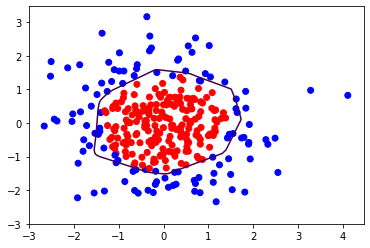

In [32]:
# 导入所需模块
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# 读入数据/标签 生成x_train y_train
df = pd.read_csv('data/dot.csv')
x_data = np.array(df[['x1', 'x2']])
y_data = np.array(df['y_c'])

x_train = x_data
y_train = y_data.reshape(-1, 1)

Y_c = [['red' if y else 'blue'] for y in y_train]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型问题报错
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

# from_tensor_slices函数切分传入的张量的第一个维度，生成相应的数据集，使输入特征和标签值一一对应
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

# 生成神经网络的参数，输入层为4个神经元，隐藏层为32个神经元，2层隐藏层，输出层为3个神经元
# 用tf.Variable()保证参数可训练
w1 = tf.Variable(tf.random.normal([2, 11]), dtype=tf.float32)
b1 = tf.Variable(tf.constant(0.01, shape=[11]))

w2 = tf.Variable(tf.random.normal([11, 1]), dtype=tf.float32)
b2 = tf.Variable(tf.constant(0.01, shape=[1]))

lr = 0.01  # 学习率为
epoch = 400  # 循环轮数

# 训练部分
for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:  # 记录梯度信息

            h1 = tf.matmul(x_train, w1) + b1  # 记录神经网络乘加运算
            h1 = tf.nn.relu(h1)
            y = tf.matmul(h1, w2) + b2

            # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_mse = tf.reduce_mean(tf.square(y_train - y))
            # 添加l2正则化
            loss_regularization = []
            # tf.nn.l2_loss(w)=sum(w ** 2) / 2
            loss_regularization.append(tf.nn.l2_loss(w1))
            loss_regularization.append(tf.nn.l2_loss(w2))
            # 求和
            # 例：x=tf.constant(([1,1,1],[1,1,1]))
            #   tf.reduce_sum(x)
            # >>>6
            # loss_regularization = tf.reduce_sum(tf.stack(loss_regularization))
            loss_regularization = tf.reduce_sum(loss_regularization)
            loss = loss_mse + 0.03 * loss_regularization # REGULARIZER = 0.03

        # 计算loss对各个参数的梯度
        variables = [w1, b1, w2, b2]
        grads = tape.gradient(loss, variables)

        # 实现梯度更新
        # w1 = w1 - lr * w1_grad
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])

    # 每200个epoch，打印loss信息
    if epoch % 20 == 0:
        print('epoch:', epoch, 'loss:', float(loss))

# 预测部分
print("*******predict*******")
# xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成间隔数值点
xx, yy = np.mgrid[-3:3:.1, -3:3:.1]
# 将xx, yy拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[xx.ravel(), yy.ravel()]
grid = tf.cast(grid, tf.float32)
# 将网格坐标点喂入神经网络，进行预测，probs为输出
probs = []
for x_predict in grid:
    # 使用训练好的参数进行预测
    h1 = tf.matmul([x_predict], w1) + b1
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1, w2) + b2  # y为预测结果
    probs.append(y)

# 取第0列给x1，取第1列给x2
x1 = x_data[:, 0]
x2 = x_data[:, 1]
# probs的shape调整成xx的样子
probs = np.array(probs).reshape(xx.shape)
plt.scatter(x1, x2, color=np.squeeze(Y_c))
# 把坐标xx yy和对应的值probs放入contour<[‘kɑntʊr]>函数，给probs值为0.5的所有点上色  plt点show后 显示的是红蓝点的分界线
plt.contour(xx, yy, probs, levels=[.5])
plt.show()

# 读入红蓝点，画出分割线，包含正则化
# 不清楚的数据，建议print出来查看 

补充内容：python matplotlib contour画等高线图

https://blog.csdn.net/Mr_Cat123/article/details/80677525

## 神经网络参数优化器

**优化器**：是引导神经网络更新参数的工具

**作用**：用来更新和计算影响模型训练和模型输出的网络参数，使其逼近或达到最优值，从而最小化(或最大化)损失函数

待优化参数w，损失函数loss, 学习率lr， 每次迭代个batch（每个batch包含2^n组数据），t表示当前batch迭代的总次数:

1.计算t时刻损失函数关于当前参数的梯度
$$
g_{t}=\nabla \operatorname{loss}=\frac{\partial \operatorname{loss}}{\partial\left(w_{t}\right)}
$$
2.计算t时刻一阶动量 $m_t$ 和二阶动量 $V_t$

- 一阶动量:与梯度相关的函数
- 二阶动量:与梯度平方相关的函数

3.计算t时刻下降梯度:
$$
\eta_{\mathrm{t}}=l r \cdot m_{\mathrm{t}} / \sqrt{V_{\mathrm{t}}}
$$
4.计算t+1时刻参数
$$
w_{\mathrm{t}+1}=w_{t}-\eta_{t}=w_{t}-l r \cdot m_{t} / \sqrt{V_{t}}
$$

**不同的优化器实质上只是定义了不同的一阶动量和二阶动量公式**

### SGD 随机梯度下降

SGD (无momentum)，常用的梯度下降法。
$$
一阶动量为梯度：m_{\mathrm{t}}=g_{\mathrm{t}} \quad 
二阶动量恒为一：V_{\mathrm{t}}=1
$$

$$
\boldsymbol{\eta}_{\mathrm{t}}=\boldsymbol{l} \boldsymbol{r} \cdot \boldsymbol{m}_{\mathrm{t}} / \sqrt{\boldsymbol{V}_{t}}=\boldsymbol{l} \boldsymbol{r} \cdot \boldsymbol{g}_{t}
$$

$$
\begin{aligned}
w_{t+1}=& w_{t}-\eta_{t} \\
&=w_{t}-l r \cdot m_{t} / \sqrt{v_{t}}=w_{t}-lr \cdot g_{t}
\end{aligned}
$$

即为
$$
\mathrm{w}_{\mathrm{t}+1}=w_{t}-l r * \frac{\partial l o s s}{\partial w_{t}}
$$

### SGDM

( SGDM (含momentum的SGD)，在SGD基础上增加一 阶动量。
$$
m_{\mathrm{t}}=\beta \cdot m_{t-1}+(1-\beta) \cdot g_{t}
$$
$m_t$：表示各时刻梯度方向的指数滑动平均值

β：超参数，趋近于1，经验值为0.9
$$
V_{\mathrm{t}}=1
$$

$$
\begin{aligned}
\eta_{\mathrm{t}}=& \operatorname{lr} \cdot m_{\mathrm{t}} / \sqrt{V_{\mathrm{t}}}=\operatorname{lr} \cdot m_{\mathrm{t}} \\
&=\operatorname{lr} \cdot\left(\beta \cdot m_{\mathrm{t}-1}+(1-\beta) \cdot g_{\mathrm{t}}\right)
\end{aligned}
$$

$$
\begin{aligned}
w_{\mathrm{t}+1}=& w_{\mathrm{t}}-\eta_{\mathrm{t}} \\
&=w_{\mathrm{t}}-l r \cdot\left(\beta \cdot m_{\mathrm{t}-1}+(1-\beta) \cdot g_{\mathrm{t}}\right)
\end{aligned}
$$

### Adagrad

Adagrad, 在SGD基础上增加二阶动量
$$
m_{\mathrm{t}}=g_{\mathrm{t}}
$$
二阶动量是从开始到现在梯度平方的累计和:
$$
V_{t}=\sum_{\tau=1}^{t} g_{\tau}^{2}
$$

$$
\begin{array}{l}
\eta_{\mathrm{t}}=lr \cdot m_{t} /(\sqrt{V_{t}}) \\
\quad=lr \cdot g_{t} /(\sqrt{\sum_{\tau=1}^{t} g_{t}^{2}})
\end{array}
$$

$$
\begin{aligned}
w_{t+1}=& w_{t}-\eta_{t} \\
&=w_{t}-lr \cdot g_{t} /(\sqrt{\sum_{\tau=1}^{t} g_{t}^{2}})
\end{aligned}
$$

### RMSProp

RMSProp, SGD基础上增加二 阶动量
$$
m_{\mathrm{t}}=g_{\mathrm{t}}
$$
二阶动量v使用指数滑动平均值计算，表征的是过去一段时间的平均值
$$
V_{t}=\beta \cdot V_{t-1}+(1-\beta) \cdot g_{t}^{2}
$$

$$
\begin{aligned}
\eta_{t}=& l r \cdot m_{\mathrm{t}} / \sqrt{V_{\mathrm{t}}} \\
&=lr \cdot g_{t} /(\sqrt{\beta \cdot V_{t-1}+(1-\beta) \cdot g_{t}^{2}})
\end{aligned}
$$

$$
\begin{aligned}
w_{t+1} &=w_{t}-\eta_{t} \\
&=w_{t}-lr \cdot g_{t} /(\sqrt{\beta \cdot V_{t-1}+(1-\beta) \cdot g_{t}^{2}})
\end{aligned}
$$

### Adam

Adam，同时结合SGDM一阶动量和RMSProp二阶动量

一阶动量：
$$
m_{\mathrm{t}}=\beta_{1} \cdot m_{t-1}+\left(1-\beta_{1}\right) \cdot g_{t}
$$
修正一阶动量的偏差，t为从训练开始到当前时刻所经历的总batch数::
$$
\widehat{m}_{\mathrm{t}}=\frac{m_{\mathrm{t}}}{1-\beta_{1}^{t}}
$$
二阶动量：
$$
V_{t}=\beta_{2} \cdot V_{s t e p-1}+\left(1-\beta_{2}\right) \cdot g_{t}^{2}
$$
修正二阶动量的偏差，t为从训练开始到当前时刻所经历的总batch数:
$$
\widehat{V_{t}}=\frac{V_{t}}{1-\beta_{2}^{t}}
$$

$$
\begin{aligned}
\eta_{t}=& lr \cdot \widehat{m}_{\mathrm{t}} / \sqrt{\widehat{V}_{t}} \\
&=\operatorname{lr} \cdot \frac{m_{\mathrm{t}}}{1-\beta_{1}^{t}} / \sqrt{\frac{V_{t}}{1-\beta_{2}^{t}}}
\end{aligned}
$$

$$
\begin{aligned}
w_{t+1} &=w_{t}-\eta_{t} \\
&=w_{t}-l r \cdot \frac{m_{t}}{1-\beta_{1}^{t}} / \sqrt{\frac{v_{t}}{1-\beta_{2}^{t}}}
\end{aligned}
$$



### 优化器对比

class2中代码p32-p40

#### SGD

loss图像
![image-11](tensorflow2.assets/SGD_loss.png)

acc图像
![image-2.png](tensorflow2.assets/SGD_acc.png)

耗时：12.678699254989624

#### SGDM

loss图像
![image-3.png](tensorflow2.assets/sgdm_loss.png)

acc图像
![image-4.png](tensorflow2.assets/sgdm_acc.png)

耗时：17.32265305519104

#### Adagrad

loss图像
![image-5.png](tensorflow2.assets/Adagrad_loss.png)

acc图像
![image-6.png](tensorflow2.assets/Adagrad_acc.png)

耗时：13.080469131469727

#### RMSProp

loss图像
![image-7.png](tensorflow2.assets/RMSProp_loss.png)

acc图像

![image-8.png](tensorflow2.assets/RMSProp_acc.png)

耗时：16.42955780029297

#### Adam

loss图像

![image-9.png](tensorflow2.assets/adam_loss.png)

acc图像

![image-10.png](tensorflow2.assets/adam_acc.png)

耗时：22.04225492477417  

# 三、使用八股搭建神经网络
## 搭建网络sequenial

用Tensorflow API: `tf. keras`

六步法搭建神经网络

- 第一步：import 相关模块，如`import tensorflow as tf`。
- 第二步：指定输入网络的训练集和测试集，如指定训练集的输入 x_train 和标签 y_train，测试集的输入 x_test 和标签 y_test。
- 第三步：逐层搭建网络结构，`model = tf.keras.models.Sequential()`。
- 第四步：在 `model.compile()` 中配置训练方法，选择训练时使用的优化器、损失函数和最终评价指标。
- 第五步：在 `model.fit()` 中执行训练过程，告知训练集和测试集的输入值和标签、每个 batch 的大小（batchsize）和数据集的迭代次数（epoch）。
- 第六步：使用 `model.summary()` 打印网络结构，统计参数数目。

### Sequential( ) 容器

`Sequential()` 可以认为是个容器，这个容器里封装了一个神经网络结构。

``` python
model = tf.keras.models.Sequential ([网络结构]) # 描述各层网络
```

在 `Sequential()` 中，要描述从输入层到输出层每一层的网络结构。每一层的网络结构可以是：

- 拉直层：`tf.keras.layers.Flatten( )`
  - 这一层不含计算，只是形状转换，把输入特征拉直变成一维数组
- 全连接层：`tf.keras.layers.Dense(神经元个数，activation= "激活函数“，kernel_regularizer=哪种正则化)`
  - activation (字符串给出)可选: relu、softmax、sigmoid、tanh
  - kernel_regularizer可 选: `tf.keras.regularizers.l1()`、 `tf.keras.regularizers.12()`
- 卷积层：`tf.keras.layers.Conv2D(filters =卷积核个数，kernel size=卷积核尺寸，strides=卷积步长，padding = " valid" or "same")`
- LSTM层；`tf.keras.layers.LSTM()`

### compile 配置神经网络的训练方法

告知训练时选择的优化器、损失函数和评测指标

```python
model.compile(optimizer = 优化器, loss = 损失函数, metrics = ["准确率"] )
```

优化器可以是以字符串形式给出的优化器名字

Optimizer（优化器）可选:

- `'sgd'` or `tf.keras optimizers.SGD (lr=学习率,momentum=动量参数)`
- `'adagrad'` or `tf.keras.optimizers.Adagrad (lr=学习率)`
- '`adadelta'` or `tf.keras.optimizers.Adadelta (lr=学习率)`
- `'adam'` or `tf.keras.optimizers.Adam (lr=学习率，beta_ 1=0.9, beta_ 2=0.999)`

loss是（损失函数）可选:

- `'mse'` or `tf.keras losses MeanSquaredError()`
- `'sparse_ categorical_crossentropy` or `tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False)`
  - `from_logits`参数：有些神经网络的输出是经过了softmax等函数的概率分布，有些则不经概率分布直接输出，`from_logits`参数是在询问是否是原始输出，即没有经概率分布的输出。
  - 如果神经网络预测结果输出前经过了概率分布，这里是False
  - 如果神经网络预测结果输出前没有经过了概率分布，直接输出，这里是True

Metrics(评测指标)可选:

`'accuracy'` : y_ 和y都是数值，如y_=[1] y=[1]

`'categorical_accuracy'` : y_ 和y都是独热码(概率分布)，如y_ =[0,1,0] y=[0 256.0.695,0.048]

`'sparse_ categorical_accuracy'` : y_ 是数值，y是独热码(概率分布)，如y_ =[1] y=[0 256,0.695,0.048]

### fit( ) 执行训练过程

```python
model.fit (训练集的输入特征，训练集的标签，
batch_size= ，epochs=,
validation_data=(测试集的输入特征，测试集的标签),
validation_split=从训练集划分多少比例给测试集，
validation_freq =多少次epoch测试一次)
```

- `batch_ size`：每次喂入神经网络的样本数，推荐个数为：$2^n$
- `epochs`：要迭代多少次数据集
- `validation_data`和`validation_split`二选一
- `validation_freq`：每多少次epoch迭代使用测试集验证一次结果

### model.summary( ) 打印和统计

`summary()`可以打印出网络的结构和参数统计

### 鸢尾花示例

In [33]:
import tensorflow as tf
from sklearn import datasets
import numpy as np

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_train)
np.random.seed(116)
np.random.shuffle(y_train)
tf.random.set_seed(116)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, 
                          activation='softmax',
                          kernel_regularizer=tf.keras.regularizers.l2())
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=500, validation_split=0.2, validation_freq=20)

model.summary()

Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 2.3173 - sparse_categorical_accuracy: 0.3417
Epoch 2/500
4/4 [==============================] - 0s 905us/step - loss: 1.0797 - sparse_categorical_accuracy: 0.6167
Epoch 3/500
4/4 [==============================] - 0s 718us/step - loss: 0.8429 - sparse_categorical_accuracy: 0.6250
Epoch 4/500
4/4 [==============================] - 0s 672us/step - loss: 0.7448 - sparse_categorical_accuracy: 0.6667
Epoch 5/500
4/4 [==============================] - 0s 676us/step - loss: 0.9843 - sparse_categorical_accuracy: 0.6417
Epoch 6/500
4/4 [==============================] - 0s 680us/step - loss: 0.7808 - sparse_categorical_accuracy: 0.6583
Epoch 7/500
4/4 [==============================] - 0s 671us/step - loss: 0.5961 - sparse_categorical_accuracy: 0.7250
Epoch 8/500
4/4 [==============================] - 0s 677us/step - loss: 0.5824 - sparse_categorical_accuracy: 0.7250
Epoch 9/500
4/4 [==============================] - 0s 725u

4/4 [==============================] - 0s 853us/step - loss: 0.3735 - sparse_categorical_accuracy: 0.9333
Epoch 136/500
4/4 [==============================] - 0s 729us/step - loss: 0.3584 - sparse_categorical_accuracy: 0.9333
Epoch 137/500
4/4 [==============================] - 0s 831us/step - loss: 0.4001 - sparse_categorical_accuracy: 0.9083
Epoch 138/500
4/4 [==============================] - 0s 744us/step - loss: 0.3530 - sparse_categorical_accuracy: 0.9583
Epoch 139/500
4/4 [==============================] - 0s 884us/step - loss: 0.4089 - sparse_categorical_accuracy: 0.9000
Epoch 140/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5121 - sparse_categorical_accuracy: 0.7750 - val_loss: 0.3758 - val_sparse_categorical_accuracy: 1.0000
Epoch 141/500
4/4 [==============================] - 0s 866us/step - loss: 0.3577 - sparse_categorical_accuracy: 0.9500
Epoch 142/500
4/4 [==============================] - 0s 940us/step - loss: 0.3597 - sparse_categorical_accuracy: 0.

Epoch 268/500
4/4 [==============================] - 0s 754us/step - loss: 0.3558 - sparse_categorical_accuracy: 0.9333
Epoch 269/500
4/4 [==============================] - 0s 736us/step - loss: 0.4076 - sparse_categorical_accuracy: 0.8750
Epoch 270/500
4/4 [==============================] - 0s 811us/step - loss: 0.4119 - sparse_categorical_accuracy: 0.9000
Epoch 271/500
4/4 [==============================] - 0s 820us/step - loss: 0.3590 - sparse_categorical_accuracy: 0.9417
Epoch 272/500
4/4 [==============================] - 0s 852us/step - loss: 0.3555 - sparse_categorical_accuracy: 0.9583
Epoch 273/500
4/4 [==============================] - 0s 740us/step - loss: 0.3999 - sparse_categorical_accuracy: 0.8833
Epoch 274/500
4/4 [==============================] - 0s 801us/step - loss: 0.3456 - sparse_categorical_accuracy: 0.9750
Epoch 275/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3543 - sparse_categorical_accuracy: 0.9333
Epoch 276/500
4/4 [=======================

Epoch 401/500
4/4 [==============================] - 0s 814us/step - loss: 0.3651 - sparse_categorical_accuracy: 0.9333
Epoch 402/500
4/4 [==============================] - 0s 781us/step - loss: 0.3480 - sparse_categorical_accuracy: 0.9583
Epoch 403/500
4/4 [==============================] - 0s 734us/step - loss: 0.3813 - sparse_categorical_accuracy: 0.9167
Epoch 404/500
4/4 [==============================] - 0s 746us/step - loss: 0.4448 - sparse_categorical_accuracy: 0.8583
Epoch 405/500
4/4 [==============================] - 0s 799us/step - loss: 0.3864 - sparse_categorical_accuracy: 0.9083
Epoch 406/500
4/4 [==============================] - 0s 810us/step - loss: 0.3440 - sparse_categorical_accuracy: 0.9583
Epoch 407/500
4/4 [==============================] - 0s 762us/step - loss: 0.4250 - sparse_categorical_accuracy: 0.8667
Epoch 408/500
4/4 [==============================] - 0s 851us/step - loss: 0.3375 - sparse_categorical_accuracy: 0.9667
Epoch 409/500
4/4 [=====================

鸢尾花分类神经网络，是四输入三输出的一层神经网络，参数12个w和3个b，共计15个参数，这一层是Dense全连接。

## 搭建网络 class

Sequential搭建神经网络的方法，用Sequential可以搭建出上层输出就是下层输入的顺序网络结构,但是无法写出一些带有跳连的非顺序网络结构。这个时候我们可以选择用类class搭建神经网络结构。

六步法搭建神经网络

1. import
2. train，test
3. class MyModel(Model) model=MyMode
4. model.compile
5. model.fit
6. model.summary

```python
class MyModel(Model):
    # 需要继承Model
	def __init__ (self):
		super(MyModel, self).__init__()
		# 定义网络结构块,super继承要与类名一致
	def cal(self, x):
	# 调用网络结构块，实现前向传播
		return y
model = MyModel()
```

- `__init__()`:定义所需网络结构块
- call( )：写出前向传播

代码示例

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from sklearn import datasets
import numpy as np

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_train)
np.random.seed(116)
np.random.shuffle(y_train)
tf.random.set_seed(116)

class IrisModel(Model):
    def __init__(self):
        super(IrisModel, self).__init__()
        self.d1 = Dense(3, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())

    def call(self, x):
        y = self.d1(x)
        return y

model = IrisModel()

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=500, validation_split=0.2, validation_freq=20)
model.summary()

Epoch 1/500
4/4 [==============================] - 0s 887us/step - loss: 2.3173 - sparse_categorical_accuracy: 0.3417
Epoch 2/500
4/4 [==============================] - 0s 775us/step - loss: 1.0797 - sparse_categorical_accuracy: 0.6167
Epoch 3/500
4/4 [==============================] - 0s 672us/step - loss: 0.8429 - sparse_categorical_accuracy: 0.6250
Epoch 4/500
4/4 [==============================] - 0s 742us/step - loss: 0.7448 - sparse_categorical_accuracy: 0.6667
Epoch 5/500
4/4 [==============================] - 0s 708us/step - loss: 0.9843 - sparse_categorical_accuracy: 0.6417
Epoch 6/500
4/4 [==============================] - 0s 702us/step - loss: 0.7808 - sparse_categorical_accuracy: 0.6583
Epoch 7/500
4/4 [==============================] - 0s 757us/step - loss: 0.5961 - sparse_categorical_accuracy: 0.7250
Epoch 8/500
4/4 [==============================] - 0s 711us/step - loss: 0.5824 - sparse_categorical_accuracy: 0.7250
Epoch 9/500
4/4 [==============================] - 0s 68

4/4 [==============================] - 0s 861us/step - loss: 0.3735 - sparse_categorical_accuracy: 0.9333
Epoch 136/500
4/4 [==============================] - 0s 910us/step - loss: 0.3584 - sparse_categorical_accuracy: 0.9333
Epoch 137/500
4/4 [==============================] - 0s 803us/step - loss: 0.4001 - sparse_categorical_accuracy: 0.9083
Epoch 138/500
4/4 [==============================] - 0s 788us/step - loss: 0.3530 - sparse_categorical_accuracy: 0.9583
Epoch 139/500
4/4 [==============================] - 0s 779us/step - loss: 0.4089 - sparse_categorical_accuracy: 0.9000
Epoch 140/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5121 - sparse_categorical_accuracy: 0.7750 - val_loss: 0.3758 - val_sparse_categorical_accuracy: 1.0000
Epoch 141/500
4/4 [==============================] - 0s 847us/step - loss: 0.3577 - sparse_categorical_accuracy: 0.9500
Epoch 142/500
4/4 [==============================] - 0s 819us/step - loss: 0.3597 - sparse_categorical_accuracy: 0.

4/4 [==============================] - 0s 869us/step - loss: 0.3558 - sparse_categorical_accuracy: 0.9333
Epoch 269/500
4/4 [==============================] - 0s 986us/step - loss: 0.4076 - sparse_categorical_accuracy: 0.8750
Epoch 270/500
4/4 [==============================] - 0s 867us/step - loss: 0.4119 - sparse_categorical_accuracy: 0.9000
Epoch 271/500
4/4 [==============================] - 0s 779us/step - loss: 0.3590 - sparse_categorical_accuracy: 0.9417
Epoch 272/500
4/4 [==============================] - 0s 783us/step - loss: 0.3555 - sparse_categorical_accuracy: 0.9583
Epoch 273/500
4/4 [==============================] - 0s 822us/step - loss: 0.3999 - sparse_categorical_accuracy: 0.8833
Epoch 274/500
4/4 [==============================] - 0s 784us/step - loss: 0.3456 - sparse_categorical_accuracy: 0.9750
Epoch 275/500
4/4 [==============================] - 0s 824us/step - loss: 0.3543 - sparse_categorical_accuracy: 0.9333
Epoch 276/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 1ms/step - loss: 0.3480 - sparse_categorical_accuracy: 0.9583
Epoch 403/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3813 - sparse_categorical_accuracy: 0.9167
Epoch 404/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4448 - sparse_categorical_accuracy: 0.8583
Epoch 405/500
4/4 [==============================] - 0s 928us/step - loss: 0.3864 - sparse_categorical_accuracy: 0.9083
Epoch 406/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3440 - sparse_categorical_accuracy: 0.9583
Epoch 407/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4250 - sparse_categorical_accuracy: 0.8667
Epoch 408/500
4/4 [==============================] - 0s 881us/step - loss: 0.3375 - sparse_categorical_accuracy: 0.9667
Epoch 409/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3470 - sparse_categorical_accuracy: 0.9333
Epoch 410/500
4/4 [==============================] - 0s 1ms/step -

## MNIST数据集

提供6万张 `28*28` 像素点的 0-9 手写数字图片和标签，用于训练。
提供1万张 `28*28` 像素点的 0-9 手写数字图片和标签，用于测试。

代码示例：

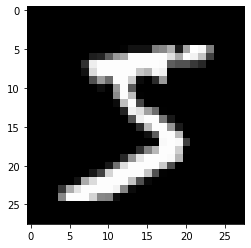

x_train[0]:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 2

In [35]:
import tensorflow as tf
from matplotlib import pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 可视化训练集输入特征的第一个元素
plt.imshow(x_train[0], cmap='gray')  # 绘制灰度图
plt.show()

# # 打印出训练集输入特征的第一个元素
# print("x_train[0]:\n", x_train[0])
# # 打印出训练集标签的第一个元素
# print("y_train[0]:\n", y_train[0])

# 打印出整个训练集输入特征形状
print("x_train.shape:\n", x_train.shape)
# 打印出整个训练集标签的形状
print("y_train.shape:\n", y_train.shape)
# 打印出整个测试集输入特征的形状
print("x_test.shape:\n", x_test.shape)
# 打印出整个测试集标签的形状
print("y_test.shape:\n", y_test.shape)

### Sequential实现手写数字识别训练

In [36]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 对输入网络的输入特征进行归一化
# 使原本0到255之间的灰度值，变为0到1之间的数值
# 把输入特征的数值变小更适合神经网络吸收
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),   # 128个神经元为超参数
    tf.keras.layers.Dense(10, activation='softmax')  # 10分类的任务，所以输出层有10个节点
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2508 - sparse_categorical_accuracy: 0.9294 - val_loss: 0.1320 - val_sparse_categorical_accuracy: 0.9597
Epoch 2/5
1875/1875 [==============================] - 2s 931us/step - loss: 0.1117 - sparse_categorical_accuracy: 0.9670 - val_loss: 0.1034 - val_sparse_categorical_accuracy: 0.9703
Epoch 3/5
1875/1875 [==============================] - 2s 892us/step - loss: 0.0761 - sparse_categorical_accuracy: 0.9774 - val_loss: 0.0850 - val_sparse_categorical_accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 2s 864us/step - loss: 0.0577 - sparse_categorical_accuracy: 0.9829 - val_loss: 0.0768 - val_sparse_categorical_accuracy: 0.9764
Epoch 5/5
1875/1875 [==============================] - 2s 878us/step - loss: 0.0440 - sparse_categorical_accuracy: 0.9865 - val_loss: 0.0746 - val_sparse_categorical_accuracy: 0.9763
Model: "sequential_1"
_________________________________________________________________

### class实现手写数字识别训练

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y


model = MnistModel()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 2s 884us/step - loss: 0.2598 - sparse_categorical_accuracy: 0.9265 - val_loss: 0.1405 - val_sparse_categorical_accuracy: 0.9554
Epoch 2/5
1875/1875 [==============================] - 2s 870us/step - loss: 0.1131 - sparse_categorical_accuracy: 0.9665 - val_loss: 0.1022 - val_sparse_categorical_accuracy: 0.9701
Epoch 3/5
1875/1875 [==============================] - 2s 828us/step - loss: 0.0761 - sparse_categorical_accuracy: 0.9776 - val_loss: 0.0882 - val_sparse_categorical_accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 2s 818us/step - loss: 0.0574 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.0732 - val_sparse_categorical_accuracy: 0.9770
Epoch 5/5
1875/1875 [==============================] - 2s 845us/step - loss: 0.0436 - sparse_categorical_accuracy: 0.9867 - val_loss: 0.0761 - val_sparse_categorical_accuracy: 0.9764
Model: "mnist_model"
________________________________________________________________

# 四、神经网络八股拓展
①自制数据集，解决本领域应用

②数据增强，扩充数据集

③断点续训，存取模型

④参数提取，把参数存入文本

⑤acc/loss可视化，查看训练效果

⑥应用程序，给图识物

本章节在此代码中进行拓展

In [38]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 2s 908us/step - loss: 0.2600 - sparse_categorical_accuracy: 0.9262 - val_loss: 0.1400 - val_sparse_categorical_accuracy: 0.9568
Epoch 2/5
1875/1875 [==============================] - 2s 895us/step - loss: 0.1154 - sparse_categorical_accuracy: 0.9659 - val_loss: 0.1019 - val_sparse_categorical_accuracy: 0.9701
Epoch 3/5
1875/1875 [==============================] - 2s 910us/step - loss: 0.0787 - sparse_categorical_accuracy: 0.9768 - val_loss: 0.0861 - val_sparse_categorical_accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 2s 899us/step - loss: 0.0590 - sparse_categorical_accuracy: 0.9821 - val_loss: 0.0743 - val_sparse_categorical_accuracy: 0.9761
Epoch 5/5
1875/1875 [==============================] - 2s 943us/step - loss: 0.0444 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.0745 - val_sparse_categorical_accuracy: 0.9752
Model: "sequential_2"
_______________________________________________________________

## 自制数据集

定义一个`def generateds(图片路径，标签文件)`函数获取自定义数据集。


```python
import tensorflow as tf
from PIL import Image
import numpy as np
import os

train_path = './mnist_image_label/mnist_train_jpg_60000/'
train_txt = './mnist_image_label/mnist_train_jpg_60000.txt'
x_train_savepath = './mnist_image_label/mnist_x_train.npy'
y_train_savepath = './mnist_image_label/mnist_y_train.npy'

test_path = './mnist_image_label/mnist_test_jpg_10000/'
test_txt = './mnist_image_label/mnist_test_jpg_10000.txt'
x_test_savepath = './mnist_image_label/mnist_x_test.npy'
y_test_savepath = './mnist_image_label/mnist_y_test.npy'


def generateds(path, txt):
    f = open(txt, 'r')  # 以只读形式打开txt文件
    contents = f.readlines()  # 读取文件中所有行
    f.close()  # 关闭txt文件
    x, y_ = [], []  # 建立空列表
    for content in contents:  # 逐行取出
        value = content.split()  # 以空格分开，图片路径为value[0] , 标签为value[1] , 存入列表
        img_path = path + value[0]  # 拼出图片路径和文件名
        img = Image.open(img_path)  # 读入图片
        img = np.array(img.convert('L'))  # 图片变为8位宽灰度值的np.array格式
        img = img / 255.  # 数据归一化 （实现预处理）
        x.append(img)  # 归一化后的数据，贴到列表x
        y_.append(value[1])  # 标签贴到列表y_
        print('loading : ' + content)  # 打印状态提示

    x = np.array(x)  # 变为np.array格式
    y_ = np.array(y_)  # 变为np.array格式
    y_ = y_.astype(np.int64)  # 变为64位整型
    return x, y_  # 返回输入特征x，返回标签y_


# 判断数据集是否存在，存在直接调用，不存在时调用generateds制作数据集
if os.path.exists(x_train_savepath) and os.path.exists(y_train_savepath) and os.path.exists(
        x_test_savepath) and os.path.exists(y_test_savepath):
    print('-------------Load Datasets-----------------')
    x_train_save = np.load(x_train_savepath)
    y_train = np.load(y_train_savepath)
    x_test_save = np.load(x_test_savepath)
    y_test = np.load(y_test_savepath)
    x_train = np.reshape(x_train_save, (len(x_train_save), 28, 28))
    x_test = np.reshape(x_test_save, (len(x_test_save), 28, 28))
else:
    print('-------------Generate Datasets-----------------')
    x_train, y_train = generateds(train_path, train_txt)
    x_test, y_test = generateds(test_path, test_txt)

    print('-------------Save Datasets-----------------')
    x_train_save = np.reshape(x_train, (len(x_train), -1))
    x_test_save = np.reshape(x_test, (len(x_test), -1))
    np.save(x_train_savepath, x_train_save)
    np.save(y_train_savepath, y_train)
    np.save(x_test_savepath, x_test_save)
    np.save(y_test_savepath, y_test)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()
```

## 数据增强

对图像的增强就是对图像进行简单形变，解决因为拍照角度不同等因素造成的影响。

tensorflow2中的数据增强函数

```python
image_gen._train = tf.keras.preprocessing.image.lmageDataGenerator(
	rescale =所有数据将乘以该数值
	rotation_ range =随机旋转角度数范围
	width_ shift range =随机宽度偏移量
	height shift range =随机高度偏移量
	水平翻转: horizontal_flip =是否随机水平翻转	
	随机缩放: zoom_range =随机缩放的范围[1-n, 1+n] )

image_gen_train.fit(x_train)
```

例如

```python
image_gen_train = ImageDataGenerator(
	rescale=1. / 1.，# 如为图像，分母为255时，可归至0 ~ 1
	rotation_ range=45, #随机45度旋转
	width_ shift_ range=.15, #宽度偏移
	height_ shift_ range= .15, #高度偏移
	horizontal_ flip=False, #水平翻转
	zoom range=0.5 # 将图像随机缩放闵量50%)
	image_ gen_train. fit(x_ train)
	
image_gen_train.fit(x_train)
```

注意：

```python
image_gen_train.fit(x_train)  # x_train需要四维数据
# 变为
x_train = x_train.reshape(x_train. shape[0], 28，28，1)
# 即将60000张28行28列的数据---变为--->60000张28行28列单通道数据，最后的1代表灰度值
```

`model.fit`也需要做出调整

```python
model.fit(x_train, y_train,batch size=32,...)
# 变为
model.fit(image_gen_train.flow(x_train, y_train,batch_size=32),...)
```

代码示例

```python
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # 给数据增加一个维度,从(60000, 28, 28)reshape为(60000, 28, 28, 1)

image_gen_train = ImageDataGenerator(
    rescale=1. / 1.,  # 如为图像，分母为255时，可归至0～1
    rotation_range=45,  # 随机45度旋转
    width_shift_range=.15,  # 宽度偏移
    height_shift_range=.15,  # 高度偏移
    horizontal_flip=False,  # 水平翻转
    zoom_range=0.5  # 将图像随机缩放阈量50％
)
image_gen_train.fit(x_train)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(image_gen_train.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_test, y_test),validation_freq=1)
model.summary()
```

## 断点续训

**读取模型**

```python
load_weights(路径文件名)
```

1. 定义存放模型的路径和文件名，命名为ckpt文件
2. 生成ckpt文件时会同步生成index索引表，所以判断索引表是否存在，来判断是否存在模型参数
3. 如有索引表，则直接读取ckpt文件中的模型参数

```python
checkpoint_save_ path ="./checkpoint/mnist.ckpt"
if os.path.exists (checkpoint_save_path +'.index') :
	print ( -------------load the mode1------- --- ------- ' )
	model.load_weights(checkpoint_save_path)
```

**保存模型**

```python
cp_callback = tf.keras.callbacks.ModelCheckpoint(
	filepath=路径文件名，
	save_weights_only= True/False,  # 是否只保留模型参数
	save_best_only=True/False)  # 是否只保留最优结果

history = model.fit ( callbacks=[cp_callback] )
```

**代码示例**

```python
import tensorflow as tf
import os

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/mnist.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,callbacks=[cp_callback])
model.summary()
```

## 参数提取

`model.trainable_variables`：返回模型中可训练的参数

设置print输出格式

```python
np.set printoptions(threshold=超过多少省略显示)

np . set_printoptions(threshold=np.inf) # np. inf表示无限大
```

代码示例

```python
import tensorflow as tf
import os
import numpy as np
np.set_printoptions(threshold=np.inf)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])
checkpoint_save_path = "./checkpoint/mnist.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,callbacks=[cp_callback])
model.summary()
print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()
```

## acc/loss可视化

```python
history=model.fit(训练集数据，训练集标签，batch_size=, epochs=,validation_split=用作测试数据的比例,validation_ data=测试集，validation_freq=测试频率)
```

history:

- 训练集loss: loss
- 测试集loss: val_loss
- 训练集准确率: sparse_categorical_accuracy
- 测试集准确率: val_sparse_categorical_accuracy

```python
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_ sparse_categorical_accuracy']
loos = history.history['loss']
val_loss = history.history['val_loss']
```

❗知识补充，关于`plt.subplot(x, y , z)`，各个参数也可以用逗号`,`分隔开也可以写在一起。第一个参数代表子图的行数；第二个参数代表该行图像的列数； 第三个参数代表每行的第几个图像。

```python
fig.tight_layout() # 调整整体空白 
plt.subplots_adjust(wspace =0, hspace =0)  # 调整子图间距
# 参数
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.2   # the amount of height reserved for white space between subplots,
               # expressed as a fraction of the average axis height
```

代码示例



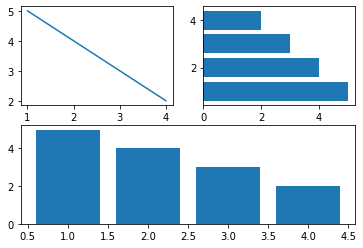

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x=[1,2,3,4]
y=[5,4,3,2]

plt.subplot(2,2,1) #呈现2行2列，第一行的第一幅图
plt.plot(x,y)

plt.subplot(2,2,2) #呈现2行2列，第一行的第二幅图
plt.barh(x,y)

plt.subplot(212)  # 第2行的全部
plt.bar(x,y)

plt.show()

-------------load the model-----------------
Epoch 1/5
1875/1875 [==============================] - 2s 983us/step - loss: 0.0120 - sparse_categorical_accuracy: 0.9968 - val_loss: 0.0838 - val_sparse_categorical_accuracy: 0.9780
Epoch 2/5
1875/1875 [==============================] - 2s 909us/step - loss: 0.0150 - sparse_categorical_accuracy: 0.9950 - val_loss: 0.0804 - val_sparse_categorical_accuracy: 0.9777
Epoch 3/5
1875/1875 [==============================] - 2s 886us/step - loss: 0.0105 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.0904 - val_sparse_categorical_accuracy: 0.9777
Epoch 4/5
1875/1875 [==============================] - 2s 837us/step - loss: 0.0107 - sparse_categorical_accuracy: 0.9968 - val_loss: 0.0916 - val_sparse_categorical_accuracy: 0.9761
Epoch 5/5
1875/1875 [==============================] - 2s 877us/step - loss: 0.0079 - sparse_categorical_accuracy: 0.9973 - val_loss: 0.0896 - val_sparse_categorical_accuracy: 0.9793
Model: "sequential_3"
__________________

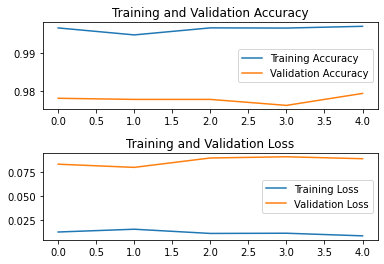

In [40]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(threshold=np.inf)

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/mnist.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
if not os.path.exists('./weights'):
    os.makedirs('./weights')                  
                      
file = open('./weights/mnist.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.subplots_adjust( hspace =0.5) 

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## 应用程序

前向传播执行应用

```python
predict(输入特征，batch_size=整数)
#  返回前向传播计算结果
```

实现步骤

```python
# 复现模型,(前向传播)
model = tf.keras.models.Sequential([
	tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dense(10, activation='softmax')])

# 加载参数
model.load_weights(model_save_path)

# 预测结果
result = model.predict(x_ predict)

```

❗知识点补充：

`np.newaxis`：在`np.newaxis`所在的位置，增加一个维度



In [41]:
# -*- coding: utf-8 -*-
"""
tf.newaxis 和 numpy newaxis
"""
import numpy as np
import tensorflow as tf

feature = np.array([[1, 2, 3],
                        [2, 4, 6]])
center = np.array([[1, 1, 1],
                   [0, 0, 0]])

print("原始数组大小：")
print(feature.shape)
print(center.shape)

np_feature_1 = feature[:, :, np.newaxis]  # 在末尾增加一个维度
np_feature_2 = feature[:, np.newaxis] # 在中间增加一个维度
np_center = center[np.newaxis, :] # 在首部增加一个维度

print()
print("添加 np.newaxis 后数组大小：")
print(np_feature_1.shape)
print(np_feature_1)
print('-----')
print(np_feature_2.shape)
print(np_feature_2)
print('-----')
print(np_center.shape)
print(np_center)

原始数组大小：
(2, 3)
(2, 3)

添加 np.newaxis 后数组大小：
(2, 3, 1)
[[[1]
  [2]
  [3]]

 [[2]
  [4]
  [6]]]
-----
(2, 1, 3)
[[[1 2 3]]

 [[2 4 6]]]
-----
(1, 2, 3)
[[[1 1 1]
  [0 0 0]]]


在 tensorflow 中有`tf.newaxis`用法相同

In [42]:
# -*- coding: utf-8 -*-
"""
tf.newaxis 和 numpy newaxis
"""
import numpy as np
import tensorflow as tf

feature = np.array([[1, 2, 3],
                        [2, 4, 6]])
center = np.array([[1, 1, 1],
                   [0, 0, 0]])

print("原始数组大小：")
print(feature.shape)
print(center.shape)

tf_feature_1 = feature[:, :, tf.newaxis]  # 在末尾增加一个维度
tf_feature_2 = feature[:, tf.newaxis] # 在中间增加一个维度
tf_center = center[tf.newaxis, :] # 在首部增加一个维度

print("添加 np.newaxis 后数组大小：")
print(tf_feature_1.shape)

print('-----')
print(tf_feature_2.shape)

print('-----')
print(tf_center.shape)

原始数组大小：
(2, 3)
(2, 3)
添加 np.newaxis 后数组大小：
(2, 3, 1)
-----
(2, 1, 3)
-----
(1, 2, 3)


对于手写图片运用识别模型进行判断

```python
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

model_save_path = './checkpoint/mnist.ckpt'
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.load_weights(model_save_path)
preNum = int(input("input the number of test pictures:"))

for i in range(preNum):
    image_path = input("the path of test picture:")
    img = Image.open(image_path)

    image = plt.imread(image_path)
    plt.set_cmap('gray')
    plt.imshow(image)

    img = img.resize((28, 28), Image.ANTIALIAS)
    img_arr = np.array(img.convert('L'))

    # 将输入图片变为只有黑色和白色的高对比图片
    for i in range(28):
        for j in range(28):
            if img_arr[i][j] < 200:  # 小于200的变为纯黑色
                img_arr[i][j] = 255
            else:
                img_arr[i][j] = 0  # 其余变为纯白色
	
	# 由于神经网络训练时都是按照batch输入
    # 为了满足神经网络输入特征的shape(图片总数，宽，高）
    # 所以要将28行28列的数据[28,28]二维数据---变为--->一个28行28列的数据[1,28,28]三维数据
    img_arr = img_arr / 255.0
    x_predict = img_arr[tf.newaxis, ...]  # 插入一个维度
    result = model.predict(x_predict)
    pred = tf.argmax(result, axis=1)

    print('\n')
    tf.print(pred)

    plt.pause(1)  # 相当于plt.show()，但是只显示1秒
    plt.close()
```

# 五、卷积神经网络

## 卷积计算过程

全连接NN：每个神经元与前后相邻层的每个神经元都有连接关系，输入是特征，输出为预测的结果。

全连接神经网络参数个数：
$$
\sum_{\text {各层 }}(\text { 前层 } \times \text { 后层 }+\text { 后层 })
$$

- w：前层*后层
- b：后层

<img src="tensorflow2.assets/image-20200601184406521.png" alt="image-20200601184406521" style="zoom:67%;" />

上一讲图片识别中，每张图片28*28个点，128个神经元参数个数为：

- 第一层参数：`28*28*128个w+128个b`
- 第二层参数：`128*10个w+10个b`

共计：101770个参数

​		实际项目中的图片多是高分辨率彩色图，待优化参数过多容易造成模型过拟合。

​		实际应用时会先对原始图像进行特征提取，再把提取到的特征送给全连接网络。

![image-20200601184529569](tensorflow2.assets/image-20200601184529569.png)

​		卷积计算可认为是一种有效提取图像特征的方法。


​		一般会用一个正方形的卷积核，按指定步长，在输入特征图上滑动遍历输入特征图中的每个像素点。每一个步长，卷积核会与输入特征图出现重合区域，重合区域对应元素相乘、求和再加上偏置项，得到输出特征的一个像素点。

- 如果输入特征是单通道灰度图，深度为1的单通道卷积核
- 如果输入特征是三通道彩色图，一个`3*3*3`的卷积核或`5*5*3`的卷积核

总之要使卷积核的通道数与输入特征图的通道数一致。因为要想让卷积核与输入特征图对应点匹配上，必须让**卷积核的深度与输入特征图的深度一致**。

**输入特征图的深度(channel数)，决定了当前层卷积核的深度。**

​		由于每个卷积核在卷积计算后，会得到张输出特征图，所以当前层使用了几个卷积核，就有几张输出特征图。

**当前层卷积核的个数，决定了当前层输出特征图的深度。**

如果觉得某层模型的特征提取能力不足，可以在这一层多用几个卷积核提高这一层的特征提取能力。

卷积核示意图：

`3*3*1`卷积核，每个核3*3+1=10个参数

![image-20200601184621697](tensorflow2.assets/image-20200601184621697.png)

`3*3*3`卷积核，每个核`3*3*3+1=28`个参数

![image-20200601184638740](tensorflow2.assets/image-20200601184638740.png)

`5*5*3`卷积核，每个核`5*5*3+1=76`个参数

![image-20200601184655230](tensorflow2.assets/image-20200601184655230.png)

​		里面的每一个小颗粒都存储着一个待训练参数，在执行卷积计算时，卷积核里的参数时固定的，在每次反向传播时，这些小颗粒中存储的待训练参数，会被梯度下降法更新。卷积就是利用立体卷积核，实现参数共享。

​		例如输入特征图为单通道，卷积核在输入特征图上滑动，每滑动一步输入特征图与卷积核里的9个元素重合，对应元素相乘求和再加上偏置项b，得到输出特征图中的一个像素值。

![image-20200601184733349](tensorflow2.assets/image-20200601184733349.png)

计算过程：`(-1)*1+0*0+1 *2+(-1)*5+0*4+1*2+(-1)*3+0*4+1*5+1=1`

​		输入特征为3通道的，选用3通道卷积核。本例中输入是是5行5列红绿蓝三通道数据，选用我选用了3*3三通道卷积核，滑动步长是1，在输入特征图上滑动，每滑动一步输入特征图与卷积核里的27个元素重合。

![3d](tensorflow2.assets/1463534-20200508204258808-152924639.png)

动图理解

![img](tensorflow2.assets/15383482-992b7d0babd4896c.webp)

![convSobel](tensorflow2.assets/convSobel.gif)



​		帮助你理解卷积核在输入特征图上按指定步长滑动，每个步长卷积核会与输入特征图上部分像素点重合，重合区域输入特征图与卷积核对应元素相乘求和，得到输出特征图中的一个像素点，当输入特征图被遍历完成，得到一张输出特征图，完成了一个卷积核的卷积计算过程。当有n个卷积核时，会有n张输出特征图，叠加在这张输出特征图的后面。

## 感受野

感受野(Receptive Field) :卷积神经网络各输出特征图中的每个像素点，在原始输入图片上映射区域的大小。

参考：https://www.cnblogs.com/shine-lee/p/12069176.html

例如：对于输入特征为`5*5`的图片，其中卷积核（filter）的步长（stride）为1、padding为0。

​		用黄色`3*3`的卷积核卷积操作，第一层这个输出特征图上的每个像素点，映射到原始图片是`3*3`的区域，所以这一层感受野为3。如果再对这个`3*3`的特征图，用这个绿色的`3*3`卷积核作用，会输出一个`1*1`的输出特征图，这个输出特征图上的像素点，映射到原始图片是5*5的区域，所以感受野为5。

​		如果对这个`5*5`的原始输入图片，直接用蓝色的`5*5`卷积核作用，会输出一个`1*1`的输出特征图，这个像素点映射到原始输入图片是5*5的区域，所以它的感受野也是5。

![image-20200601184934017](tensorflow2.assets/image-20200601184934017.png)

​		同样一个`5*5`的原始输入图片,经过两层`3*3`的卷积核作用，和经过一层`5*5`的卷积核作用,都得到一个感受野是5的输出特征图。所以这两种方式特征提取能力是一致的。

​		是选择两层`3*3`卷积运算的好，还是一层`5*5`卷积运算的好？需要考虑他们所承载的待训练参数量和计算量。

​		设输入特征图宽、高为x，卷积计算步长为1，卷积核为`n*n`

每个`n*n*1`的卷积核经过 $n^2$ 计算得到一个输出像素点，得到的特征图为$(x-(n-1))^{2}$大小，所以计算量计算公式：
$$
n{^2}*(x - (n -1) {^2} + n{^2}*(x - 2*(n -1) {^2} + .......
$$
对于两层`3*3`卷积运算

参数量：`3*3`+`3*3`=18

计算量：
$$
3*3*(x-2)^{2} +3*3*(x-4)^{2} 
$$
对于一层`5*5`卷积运算

参数量：`5*5=25`

计算量：
$$
5*5*(x-4)^{2} 
$$

⚠️ 当 **x > 10** 时，两层`3*3`卷积核 优于一层`5*5`卷积核，这也就是为什么现在的神经网络在卷积计算中，常用使用两层`3*3`卷积核



## 全零填充

为保证卷积计算保持输入特征图的尺寸不变，可以使用全零填充，在输入特征图周围填充0，

例如对`5*5*1`的输入特征图经过全零填充后，再通过`3*3*1`的卷积核，进行进行步长为1的卷积计算，输出特征图仍是`5*5*1`

输出图片边长=输入图片边长/步长
此图:`5/1=5`

![img](tensorflow2.assets/1502769-20181006120039846-1541074916.png)

卷积输出特征图维度计算公式：

SAME（全零填充）向上取整，例如2.3取3:
$$
padding =\frac{\text { 输入特征图边长 }}{\text { 步长 }}
$$


VALID（不全0填充）向上取整：
$$
padding =\frac{\text {输入特征图边长 }-\text { 卷积核长 } +1}{\text {步长}}
$$
TF描述是否全零填充

- 用参数`padding = 'SAME`'表示使用全零填充
- 用参数`padding = 'VALID'`表示不使用全零填充

示例：

![image-20200601185005907](tensorflow2.assets/image-20200601185005907.png)

## TF描述卷积计算层

Tensorflow给出了计算卷积的函数

```python
tf.keras.layers.Conv2D (
	filters = 卷积核个数,
	kernel_size = 卷积核尺寸, # 正方形写核长整数，或(核高h,核宽w)
	strides = 滑动步长，# 横纵向相同写步长整数，或纵向步长h，横向步长w， 默认1
	padding = "same" or "Valid", # 使用全零填充是"same",不使用是"valid" (默认)
	activation ="relu" or "sigmoid" or "tanh" or "softmax" 等 # 如有 BN 此处不写，会在后面单独写
	input_shape = (高，宽，通道数)  # 输入特征图维度，可省略
)
```

示例

```python
model = tf.keras.mode.Sequential([
	Conv2D(6， 5，padding='valid', activation='sigmoid'),
	MaxPoo12D(2，2)，
	Conv2D(6, (5, 5)，padding=' valid', activation= 'sigmoid'),
	MaxPool2D(2, (2, 2))，
	Conv2D(filters=6， kerne1_size=(5，5), padding='valid', activation= 'sigmoid' )，
	MaxPool2D(pooI_s1ze=(2, 2), strides=2),
	Flatten(),
	Dense(10, activation='softmax')
])
```

## 批标准化(BN)

批标准化(Batch Normalization, BN)

​		神经网络对 0 附近的数据更敏感，但是随着网络层数的增加，特征数据会出现偏离 0 均值的情况。

- **标准化**：可以使数据符合以 0 为均值，1 为标准差的分布。把偏移的特征数据重新拉回到 0 附近。
- **批标准化**：对 **一小批数据 (batch)** ，做标准化处理。使数据回归标准正态分布，**常用在卷积操作和激活操作之间**。

可以通过下方的式子计算批标准化后的输出特征图，得到第k个卷积核的输出特征图 (feature map) 中的第 i 个像素点。批标准化操作，会让每个像素点进行减均值除以标准差的自更新计算。

$$
H_{i}^{k}：批标准化前，第k个卷积核，输出特征图中第i个像素点
$$

$$
H_{i}^{'k}=\frac{H_{i}^{k}-\mu_{\mathrm{batch}}^{k}}{\sigma_{\mathrm{batch}}^{k}}
$$

$$
\mu_{\mathrm{batch}}^{k}：批标准化前，第k个卷积核，batch张 输出特征图中所有像素点平均值
$$

$$
\boldsymbol{\mu}_{\text {batch }}^{k}=\frac{\mathbf{1}}{m} \sum_{i=1}^{m} H_{i}^{k}
$$


$$
{\sigma_{\mathrm{batch}}^{k}}：批标准化前，第k个卷积核。batch张输出特征图中所有像素点标准差
$$

$$
\sigma_{\text {batch }}^{k}=\sqrt{\delta+\frac{1}{m} \sum_{i=1}^{m}\left(H_{i}^{k}-\mu_{\text {batch }}^{k}\right)^{2}}
$$

![image-20200601185040696](tensorflow2.assets/image-20200601185040696.png)

​		BN操作将原本偏移的特征数据，重新拉回到0均值，使进入激活函数的数据分布在激活函数线性区，使得输入数据的微小变化，更明显的体现到激活函数的输出，提升了激活函数对输入数据的区分力。

![image-20200601185100718](tensorflow2.assets/image-20200601185100718.png)

$$
x_{i}^{k}=\gamma_{k} H_{i}^{\prime k}+\beta_{k}
$$

​		反向传播时，缩放因子γ和偏移因子β会与其他待训练参数一同被训练优化，便标难正态分布后的特征数据，通过缩放因子和偏移因子，优化了特征数据分布的宽窄和偏移量，保证了网络的非线性表达力。

![image-20200601185230896](tensorflow2.assets/image-20200601185230896.png)

BN层位于卷积层之后，激活层之前。TF描述批标准化

```python
tf.keras.layers.BatchNormalization()
```

示例

```python
model = tf.keras.models.Sequential([
	Conv2D(filters=6，kernel_size=(5, 5)，padding='same')，#卷积层
	BatchNormalization()，# BN层
	Activation('relu'), # 激活层
	MaxPoo12D(poo1_size=(2, 2)，strides=2，padding='same'), # 池化层
	Dropout(0.2)，# dropout层
])
```

## 池化

池化操作用于减少告积神经网络中特征数据量。

- 最大值池化可提取图片纹理
- 均值池化可保留背景特征

如果用`2*2`的池化核对输入图片以2为步长进行池化，输出图片将变为输入图片的四分之一大小。

最大池化：是用2*2的池化核框住4个像素点，选择每次框住4个像素点中最大的值输出，直到遍历完整幅图片。

均值池:是用2*2的池化核框住4个像素点，每次输出四个像素点的均值，直到遍历完整幅图片。

<img src="tensorflow2.assets/image-20200601185338038.png" alt="image-20200601185338038" style="zoom:67%;" />

**Tensorflow池化函数**

最大值池化

```python
tf.keras.layers.MaxPool2D(
	pool_size=池化核尺寸， # 正方形写核长整数，或(核高h，核宽w)
	strides=池化步长， #步长整数，或(纵向步长h,横向步长w)，默认为pool_size
	padding='valid'or'same' #使用全零填充是"same"，不使用是"valid" (默认)
)
```

均值池化

```python
tf.keras.layers.AveragePooling2D(
	pool_size=池化核尺寸， # 正方形写核长整数，或(核高h，核宽w)
	strides=池化步长， #步长整数，或(纵向步长h,横向步长w)，默认为pool_size
	padding='valid'or'same' #使用全零填充是"same"，不使用是"valid" (默认)
)
```

示例

```python
model = tf.keras.models.Sequential([
	Conv2D(filters=6，kernel size=(5, 5)，padding='same'), #卷积层
	BatchNormalization()，# BN层
	Activation('relu'), # 激活层
	MaxPoo12D(poo1_size=(2, 2)，strides=2，padding='same'), # 池化层
	Dropout(0.2)，# dropout层
])
```

补充：`GlobalAveragePooling2D`是平均池化的一个特例，它不需要指定 pool_size 和 strides 等参数，操作的实质是将输入特征图的每一个通道求平均得到一个数值。

## 舍弃

为了缓解神经网络过拟合，在神经网络训练过程中，常把隐藏层的部分神经元按照一定比例从神经网络中临时舍弃，在使用神经网络时再把所有神经元恢复到神经网络中。

![image-20200601185401794](tensorflow2.assets/image-20200601185401794.png)

**Tensorflow舍弃函数**

```python
tf.keras.layers.Dropout(舍弃的概率)
```

示例

```python
model = tf.keras.models.Sequential([
	Conv2D(filters=6，kernel size=(5, 5)，padding='same')，#卷积层
	BatchNormalization(), # BN层
	Activation('relu'), # 激活层
	MaxPoo12D(poo1_size=(2, 2), strides=2, padding='same'), # 池化层
	Dropout(0.2)，# dropout层，0.2表示随机舍弃掉 20% 的神经元
])
```

## 卷积神经网络

卷积神经网络:卷积神经网络就是借助卷积核对输入特征进行特征提取，再把提取到的特征送入全连接网络进行识别预测。

卷积神经网络网络的主要模块

![image-20200601185414984](tensorflow2.assets/image-20200601185414984.png)

**卷积是什么?**

卷积就是特征提取器 ，就是 ``CBAPD``

```python
model = tf.keras.models.Sequential([
C	Conv2D(filters=6，kernel size=(5, 5), padding='same'),
	#卷积层
B	BatchNormalization(), # BN层
A	Activation('relu'), # 激活层
P	MaxPoo12D(poo1_size=(2, 2)，strides=2, padding='same'), 
	# 池化层
D	Dropout(0.2)，# dropout层，0.2表示随机舍弃掉20%的神经元
])
```

## CIFAR10数据集

cifar10数据集一共有6万张彩色图片，每张图片有32行32列像素点的红绿蓝三通道数据。

- 提供5万张`32*32`像素点的十分类彩色图片和标签，用于训练。
- 提供1万张`32*32`像素点的十分类彩色图片和标签，用于测试。
- 十个分类分别是：飞机、汽车、鸟、猫、鹿、狗、青蛙、马、船和卡车，2
  分别对应标签0、1、2、3一直到9

导入cifar10数据集:

```python
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
```

代码示例：

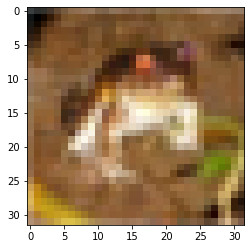

x_train.shape:
 (50000, 32, 32, 3)
y_train.shape:
 (50000, 1)
x_test.shape:
 (10000, 32, 32, 3)
y_test.shape:
 (10000, 1)


In [43]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 可视化训练集输入特征的第一个元素
plt.imshow(x_train[0])  # 绘制图片
plt.show()

# # 打印出训练集输入特征的第一个元素
# print("x_train[0]:\n", x_train[0])
# # 打印出训练集标签的第一个元素
# print("y_train[0]:\n", y_train[0])

# 打印出整个训练集输入特征形状
print("x_train.shape:\n", x_train.shape)
# 打印出整个训练集标签的形状
print("y_train.shape:\n", y_train.shape)
# 打印出整个测试集输入特征的形状
print("x_test.shape:\n", x_test.shape)
# 打印出整个测试集标签的形状
print("y_test.shape:\n", y_test.shape)

## 卷积神经网络搭建示例

用卷积神经网络训练cifar10数据集，搭建一个一层卷积、两层全连接的网络。

![image.png](tensorflow2.assets/image-20200601185648055.png)

代码示例

-------------load the model-----------------
Epoch 1/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9592 - sparse_categorical_accuracy: 0.6591 - val_loss: 1.1266 - val_sparse_categorical_accuracy: 0.6063
Epoch 2/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9322 - sparse_categorical_accuracy: 0.6683 - val_loss: 1.1963 - val_sparse_categorical_accuracy: 0.5932
Epoch 3/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9633 - sparse_categorical_accuracy: 0.6566 - val_loss: 1.1182 - val_sparse_categorical_accuracy: 0.6100
Epoch 4/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9382 - sparse_categorical_accuracy: 0.6663 - val_loss: 1.1270 - val_sparse_categorical_accuracy: 0.6106
Epoch 5/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9894 - sparse_categorical_accuracy: 0.6468 - val_loss: 1.2809 - val_sparse_categorical_accuracy: 0.5604
Model: "baseline"
______________________

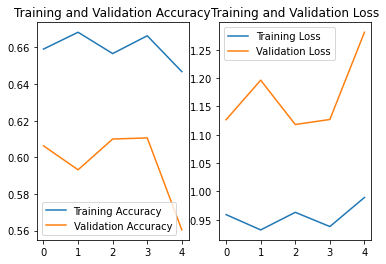

In [44]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 卷积神经网络CBAPD
class Baseline(Model):
    def __init__(self):
        super(Baseline, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5), padding='same')  # 卷积层
        self.b1 = BatchNormalization()  # BN层
        self.a1 = Activation('relu')  # 激活层
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')  # 池化层
        self.d1 = Dropout(0.2)  # dropout层

        self.flatten = Flatten()
        self.f1 = Dense(128, activation='relu')
        self.d2 = Dropout(0.2)
        self.f2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        x = self.d1(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d2(x)
        y = self.f2(x)
        return y


model = Baseline()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/Baseline.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1, callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights/BaselineConv2D.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

在 ``weights.txt``文件里记录了所有可训练参数

- ``baseline/conv2d/kernel:0`` ``(5, 5, 3, 6)``记录了第层网络用的`5*5*3`的卷积核，一共6个，下边给出了这6个卷积核中的所有参数W；
- ``baseline/conv2d/bias:0`` ``(6,)``这里记录了6个卷积核各自的偏置项b，每个卷积核一个 b，6个卷积核共有6个偏置6 ；
- ``baseline/batch_normalization/gamma:0`` ``(6,)`` 这里记录了BN操作中的缩放因子γ，每个卷积核一个γ，一个6个γ；
- ``baseline/batch_normalization/beta:0`` ``(6,)`` 里记录了BN操作中的偏移因子β，每个卷积核一个β，一个6个β；
- ``baseline/dense/kernel:0`` ``(1536, 128)``，这里记录了第一层全链接网络，1536 行、128列的线上的权量w；
- ``baseline/dense/bias:0`` ``(128,)`` 这里记录了第一层全连接网络128个偏置b；
- ``baseline/dense_1/kernel:0`` ``(128, 10)`` 这里记录了第二层全链接网络，128行、10列的线上的权量w；
- ``baseline/dense_1/bias:0`` ``(10,)``这里记录了第二层全连接网络10个偏置b。

## 经典卷积网络
![image.png](tensorflow2.assets/image-20200601185829698.png)

### LeNet

​		LeNet卷积神经网络是LeCun于1998年提出，是卷积神经网络的开篇之作。通过共享卷积核减少了网络的参数

​		在统计卷积神经网络层数时，一般只统计卷积计算层和全连接计算层，其余操作可以认为是卷积计算层的附属，LeNet共有五层网络。

![image-3.png](tensorflow2.assets/image-20200515160919011.png)

经过C1和C3两层卷积后，再经过连续的三层全链接。

- 第一层卷积：6个`5*5`的卷积核；卷积步长时1；不使用全零填充；LeNet提出时还没有BN操作，所以不使用BN操作；LeNet时代sigmoid是主流的激活函数，所以使用sigmoid激活函数；用`2*2`的池化核，步长为2，不使用全零填充；LeNet时代还没有Dropout，不使用Dropout。
- 第二层是16个`5*5`的卷积核；卷积步长为1；不使用全零填充；不使用BN操作；使用sigmoid激活函数；用`2*2`的池化核，步长为2，不使用全零填充；不使用Dropout。
- FLatten拉直，连续三层全连接网络，神经元分别是120、84、10，前两层全连接使用sigmoid激活函数，最后一层使用softmax使输出符合概率分布。

![image-4.png](tensorflow2.assets/image-20200515165118977.png)

代码示例

-------------load the model-----------------
Epoch 1/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2413 - sparse_categorical_accuracy: 0.5558 - val_loss: 1.2713 - val_sparse_categorical_accuracy: 0.5463
Epoch 2/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2166 - sparse_categorical_accuracy: 0.5608 - val_loss: 1.2583 - val_sparse_categorical_accuracy: 0.5469
Epoch 3/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1941 - sparse_categorical_accuracy: 0.5722 - val_loss: 1.2391 - val_sparse_categorical_accuracy: 0.5523
Epoch 4/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1687 - sparse_categorical_accuracy: 0.5830 - val_loss: 1.2141 - val_sparse_categorical_accuracy: 0.5663
Epoch 5/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1460 - sparse_categorical_accuracy: 0.5906 - val_loss: 1.1991 - val_sparse_categorical_accuracy: 0.5728
Model: "le_net5"
_______________________

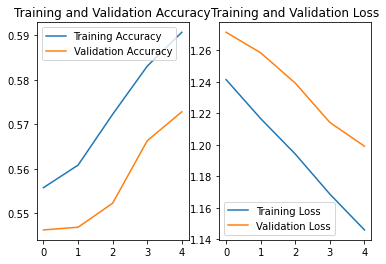

In [45]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5),
                         activation='sigmoid')
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2)

        self.c2 = Conv2D(filters=16, kernel_size=(5, 5),
                         activation='sigmoid')
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2)

        self.flatten = Flatten()
        self.f1 = Dense(120, activation='sigmoid')
        self.f2 = Dense(84, activation='sigmoid')
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.p2(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x)
        return y


model = LeNet5()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/LeNet5.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### AlexNet

​		AlexNet网络诞生于2012年，是Hinton的代表作之一，当年ImageNet竞赛的冠军，Top5错 误率为16.4%。

​		AlexNet使用relu激活函数，提升了训练速度，使用Dropout缓解了过拟合，AlexNet共有8层

![image.png](tensorflow2.assets/image-20200515164106081.png)

- 第一层使用了96个`3*3`卷积核；步长为1；不使用全零填充；原论文中使用局部响应标准化LRN，由于LRN操作近些年用得很少，它的功能与批标准化BN相似，所以选择当前主流的BN操作实现特征标准化；使用relu激活函数；用3*3的池化核步长是2做最大池化；不使用Dropout；
- 第二层使用了256个`3*3`卷积核；步长为1；不使用全零填充；选择BN操作实现特征标准化；使用relu激活函数；用3*3的池化核步长是2做最大池化；不使用Dropout；
- 第三层使用了384个`3*3`卷积核；步长为1；使用全零填充；不使用BN操作实现特征标准化；使用relu激活函数；不使用池化；不使用Dropout；
- 第四层使用了384个`3*3`卷积核；步长为1；使用全零填充；不使用BN操作实现特征标准化；使用relu激活函数；不使用池化；不使用Dropout；
- 第五层使用了256个`3*3`卷积核；步长为1；使用全零填充；不使用BN操作；使用relu激活函数；用3*3的池化核步长是2做最大池化；不使用Dropout；
- 第六七八层是全连接层，六七层使用2048个神经元，relu激活函数50%Dropout；第八层使用10个神经元，用softmax使输出符合概率分布

![image-2.png](tensorflow2.assets/image-20200515165047050.png)

代码示例

-------------load the model-----------------
Epoch 1/5
1563/1563 [==============================] - 311s 199ms/step - loss: 1.0011 - sparse_categorical_accuracy: 0.6555 - val_loss: 1.4418 - val_sparse_categorical_accuracy: 0.5729
Epoch 2/5
1563/1563 [==============================] - 306s 196ms/step - loss: 0.9527 - sparse_categorical_accuracy: 0.6755 - val_loss: 1.0518 - val_sparse_categorical_accuracy: 0.6329
Epoch 3/5
1563/1563 [==============================] - 306s 196ms/step - loss: 0.9155 - sparse_categorical_accuracy: 0.6904 - val_loss: 0.9494 - val_sparse_categorical_accuracy: 0.6765
Epoch 4/5
1563/1563 [==============================] - 304s 194ms/step - loss: 0.8682 - sparse_categorical_accuracy: 0.7083 - val_loss: 1.0480 - val_sparse_categorical_accuracy: 0.6362
Epoch 5/5
1563/1563 [==============================] - 310s 198ms/step - loss: 0.8277 - sparse_categorical_accuracy: 0.7218 - val_loss: 0.9555 - val_sparse_categorical_accuracy: 0.6773
Model: "alex_net8"
___________

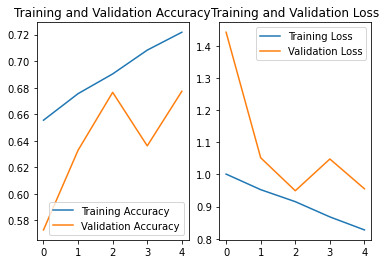

In [46]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class AlexNet8(Model):
    def __init__(self):
        super(AlexNet8, self).__init__()
        self.c1 = Conv2D(filters=96, kernel_size=(3, 3))
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.p1 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.c2 = Conv2D(filters=256, kernel_size=(3, 3))
        self.b2 = BatchNormalization()
        self.a2 = Activation('relu')
        self.p2 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.c3 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
                         
        self.c4 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
                         
        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same',
                         activation='relu')
        self.p3 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.flatten = Flatten()
        self.f1 = Dense(2048, activation='relu')
        self.d1 = Dropout(0.5)
        self.f2 = Dense(2048, activation='relu')
        self.d2 = Dropout(0.5)
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p2(x)

        x = self.c3(x)

        x = self.c4(x)

        x = self.c5(x)
        x = self.p3(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d1(x)
        x = self.f2(x)
        x = self.d2(x)
        y = self.f3(x)
        return y


model = AlexNet8()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/AlexNet8.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights/AlexNet8.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### VGGNet

​		VGGNet诞生于2014年，当年ImageNet竞 赛的亚军，Top5错 误率减小到7.3%。

​		VGGNet使用小尺寸卷积核，在减少参数的同时提高了识别准确率，VGGNetl的网络结构规整，非常适合硬件加速

![VGGNet](tensorflow2.assets/VGG_net.png)

​		设计这个网络时，卷积核的个数从64到128到256到512，逐渐增加，因为越靠后，特征图尺寸越小。通过增加卷积核的个数，增加了特征图深度，保持了信息的承载能力。

代码示例

-------------load the model-----------------
Epoch 1/5
1563/1563 [==============================] - 857s 547ms/step - loss: 1.4855 - sparse_categorical_accuracy: 0.4192 - val_loss: 1.5307 - val_sparse_categorical_accuracy: 0.4399
Epoch 2/5
1563/1563 [==============================] - 863s 552ms/step - loss: 1.1823 - sparse_categorical_accuracy: 0.5817 - val_loss: 1.1116 - val_sparse_categorical_accuracy: 0.6180
Epoch 3/5
1563/1563 [==============================] - 864s 553ms/step - loss: 0.9814 - sparse_categorical_accuracy: 0.6649 - val_loss: 1.0425 - val_sparse_categorical_accuracy: 0.6609
Epoch 4/5
1563/1563 [==============================] - 855s 547ms/step - loss: 0.8535 - sparse_categorical_accuracy: 0.7138 - val_loss: 0.7976 - val_sparse_categorical_accuracy: 0.7242
Epoch 5/5
1563/1563 [==============================] - 853s 546ms/step - loss: 0.7496 - sparse_categorical_accuracy: 0.7540 - val_loss: 0.7011 - val_sparse_categorical_accuracy: 0.7577
Model: "vg_g16"
______________

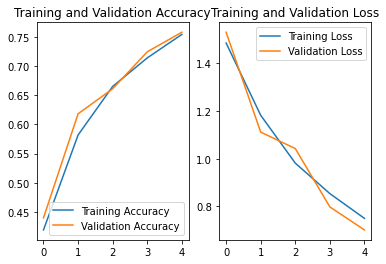

In [47]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class VGG16(Model):
    def __init__(self):
        super(VGG16, self).__init__()
        self.c1 = Conv2D(filters=64, kernel_size=(3, 3), padding='same')  # 卷积层1
        self.b1 = BatchNormalization()  # BN层1
        self.a1 = Activation('relu')  # 激活层1
        self.c2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', )
        self.b2 = BatchNormalization()  # BN层1
        self.a2 = Activation('relu')  # 激活层1
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d1 = Dropout(0.2)  # dropout层

        self.c3 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b3 = BatchNormalization()  # BN层1
        self.a3 = Activation('relu')  # 激活层1
        self.c4 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b4 = BatchNormalization()  # BN层1
        self.a4 = Activation('relu')  # 激活层1
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d2 = Dropout(0.2)  # dropout层

        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b5 = BatchNormalization()  # BN层1
        self.a5 = Activation('relu')  # 激活层1
        self.c6 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b6 = BatchNormalization()  # BN层1
        self.a6 = Activation('relu')  # 激活层1
        self.c7 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b7 = BatchNormalization()
        self.a7 = Activation('relu')
        self.p3 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d3 = Dropout(0.2)

        self.c8 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b8 = BatchNormalization()  # BN层1
        self.a8 = Activation('relu')  # 激活层1
        self.c9 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b9 = BatchNormalization()  # BN层1
        self.a9 = Activation('relu')  # 激活层1
        self.c10 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b10 = BatchNormalization()
        self.a10 = Activation('relu')
        self.p4 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d4 = Dropout(0.2)

        self.c11 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b11 = BatchNormalization()  # BN层1
        self.a11 = Activation('relu')  # 激活层1
        self.c12 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b12 = BatchNormalization()  # BN层1
        self.a12 = Activation('relu')  # 激活层1
        self.c13 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b13 = BatchNormalization()
        self.a13 = Activation('relu')
        self.p5 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d5 = Dropout(0.2)

        self.flatten = Flatten()
        self.f1 = Dense(512, activation='relu')
        self.d6 = Dropout(0.2)
        self.f2 = Dense(512, activation='relu')
        self.d7 = Dropout(0.2)
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p1(x)
        x = self.d1(x)

        x = self.c3(x)
        x = self.b3(x)
        x = self.a3(x)
        x = self.c4(x)
        x = self.b4(x)
        x = self.a4(x)
        x = self.p2(x)
        x = self.d2(x)

        x = self.c5(x)
        x = self.b5(x)
        x = self.a5(x)
        x = self.c6(x)
        x = self.b6(x)
        x = self.a6(x)
        x = self.c7(x)
        x = self.b7(x)
        x = self.a7(x)
        x = self.p3(x)
        x = self.d3(x)

        x = self.c8(x)
        x = self.b8(x)
        x = self.a8(x)
        x = self.c9(x)
        x = self.b9(x)
        x = self.a9(x)
        x = self.c10(x)
        x = self.b10(x)
        x = self.a10(x)
        x = self.p4(x)
        x = self.d4(x)

        x = self.c11(x)
        x = self.b11(x)
        x = self.a11(x)
        x = self.c12(x)
        x = self.b12(x)
        x = self.a12(x)
        x = self.c13(x)
        x = self.b13(x)
        x = self.a13(x)
        x = self.p5(x)
        x = self.d5(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d6(x)
        x = self.f2(x)
        x = self.d7(x)
        y = self.f3(x)
        return y


model = VGG16()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/VGG16.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights/VGG16.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### InceptionNet

​		InceptionNet诞生于2014年，当年ImageNet竞赛冠军，Top5错 误率为6.67%，InceptionNet引入Inception结构块，在同一层网络内使用不同尺寸的卷积核，提升了模型感知力，使用了批标准化，缓解了梯度消失。

​		InceptionNet的核心是它的基本单元Inception结构块，无论是GoogLeNet 也就是Inception v1，还是inceptionNet的后续版本，比如v2、v3、v4，都是基于Inception结构块搭建的网络。

​		Inception结构块在同层网络中便用了多个尺导的卷积核，可以提取不同尺寸的特征，通过`1*1`卷积核，作用到输入特征图的每个像素点，**通过设定少于输入特征图深度的`1*1`卷积核个数，减少了输出特征图深度，起到了降维的作用，减少了参数量和计算量**。

<img src="tensorflow2.assets/image-20200518224538455.png" alt="image-20200518224538455" style="zoom:67%;" />

​		图中给出了一个Inception的结构块，Inception结构块包含四个分支，分别经过

- `1*1`卷积核输出到卷积连接器，
- `1*1`卷积核配合`3*3`卷积核输出到卷积连接器
- `1*1`卷积核配合`5*5`卷积核输出到卷积连接器
- `3*3`最大池化核配合`1*1`卷积核输出到卷积连接器

​        送到卷积连接器的特征数据尺导程同，卷积连接器会把收到的这四路特征数据按深度方向拼接，形成Inception结构块的输出。

![image-20200518224609912](tensorflow2.assets/image-20200518224609912.png)

​		Inception结构块用CBAPD描述出来，用颜色对应上Inception结构块内的操作。

![image-20200518224729785](tensorflow2.assets/image-20200518224729785.png)

- 第一分支卷积采用了16个`1*1`卷积核，步长为1全零填充，采用BN操作relu激活函数；
- 第二分支先用16个`1*1`卷积核降维，步长为1全零填充，采用BN操作relu激活函数；再用16个`3*3`卷积核，步长为1全零填充，采用BN操作relu激活函数；
- 第三分支先用16个`1*1`卷积核降维，步长为1全零填充，采用BN操作relu激活函数；再用16个`5*5`卷积核，步长为1全零填充，采用BN操作relu激活函数；
- 第四分支先采用最大池化，池化核尺可是`3*3`，步长为1全零填充；再用16个`1*1`卷积核降维，步长为1全零填充，采用BN操作relu激活函数；

​       卷积连接器把这四个分支按照深度方向堆叠在一起，构成Inception结构块的输出，由于Inception结构块中的卷积操作均采用了CBA结构，即先卷积再BN再采用relu激活函数，所以将其定义成一个新的类ConvBNRelu，减少代码长度，增加可读性。

```python
class ConvBNRelu(Model):
    def __init__(self, ch, kernelsz=3, strides=1, padding='same'):
        # 定义了默认卷积核边长是3步长为1全零填充
        super(ConvBNRelu, self).__init__()
        self.model = tf.keras.models.Sequential([
            Conv2D(ch, kernelsz, strides=strides, padding=padding),
            BatchNormalization(),
            Activation('relu')
        ])

    def call(self, x):
        x = self.model(x, training=False) 
        #在training=False时，BN通过整个训练集计算均值、方差去做批归一化，training=True时，通过当前batch的均值、方差去做批归一化。推理时 training=False效果好
        return x
```

​		参数 ch 代表特征图的通道数，也即卷积核个数；kernelsz 代表卷积核尺寸；strides 代表卷积步长；padding 代表是否进行全零填充。
​		 完成了这一步后，就可以开始构建 InceptionNet 的基本单元了，同样利用 class 定义的方式，定义一个新的 InceptionBlk类。

```python
class InceptionBlk(Model):
    def __init__(self, ch, strides=1):
        super(InceptionBlk, self).__init__()
        self.ch = ch
        self.strides = strides
        self.c1 = ConvBNRelu(ch, kernelsz=1, strides=strides)
        self.c2_1 = ConvBNRelu(ch, kernelsz=1, strides=strides)
        self.c2_2 = ConvBNRelu(ch, kernelsz=3, strides=1)
        self.c3_1 = ConvBNRelu(ch, kernelsz=1, strides=strides)
        self.c3_2 = ConvBNRelu(ch, kernelsz=5, strides=1)
        self.p4_1 = MaxPool2D(3, strides=1, padding='same')
        self.c4_2 = ConvBNRelu(ch, kernelsz=1, strides=strides)

    def call(self, x):
        x1 = self.c1(x)
        x2_1 = self.c2_1(x)
        x2_2 = self.c2_2(x2_1)
        x3_1 = self.c3_1(x)
        x3_2 = self.c3_2(x3_1)
        x4_1 = self.p4_1(x)
        x4_2 = self.c4_2(x4_1)
        # concat along axis=channel
        x = tf.concat([x1, x2_2, x3_2, x4_2], axis=3)
        return x
```

​		参数 ch 仍代表通道数，strides 代表卷积步长，与 ConvBNRelu 类中一致；`tf.concat` 函数将四个输出按照深度方向连接在一起，x1、x2_2、x3_2、x4_2 分别代表四列输出，结合结构图和代码很容易看出二者的对应关系。
​		InceptionNet 网络的主体就是由其基本单元构成的，有了Inception结构块后，就可以搭建出一个精简版本的InceptionNet，网络共有10层，其模型结构如图

​		第一层采用16个3*3卷积核，步长为1，全零填充，BN操作，rule激活。随后是4个Inception结构块顺序相连，每两个Inception结构块组成俞block，每个bIock中的第一个Inception结构块，卷积步长是2，第二个Inception结构块，卷积步长是1，这使得第一个Inception结构块输出特征图尺寸减半，因此把输出特征图深度加深，尽可能保证特征抽取中信息的承载量一致。

​		block_0设置的通道数是16，经过了四个分支，输出的深度为`4*16=64`；在`self.out_channels *= 2`给通道数加倍了，所以block_1通道数是block_0通道数的两倍是32，经过了四个分支，输出的深度为`4*32=128`，这128个通道的数据会被送入平均池化，送入10个分类的全连接。

<img src="tensorflow2.assets/image-20200518230251277.png" alt="image-20200518230251277" style="zoom:67%;" />

```python
class Inception10(Model):
    def __init__(self, num_blocks, num_classes, init_ch=16, **kwargs):
        super(Inception10, self).__init__(**kwargs)
        self.in_channels = init_ch
        self.out_channels = init_ch
        self.num_blocks = num_blocks
        self.init_ch = init_ch

        # 第一层采用16个3*3卷积核，步长为1，全零填充，BN操作，rule激活。
        # 设定了默认init_ch=16,默认输出深度是16，
        # 定义ConvBNRe lu类的时候，默认卷积核边长是3步长为1全零填充，所以直接调用
        self.c1 = ConvBNRelu(init_ch)

        # 每个bIock中的第一个Inception结构块，卷积步长是2，
        # 第二个Inception结构块，卷积步长是1，
        self.blocks = tf.keras.models.Sequential()
        for block_id in range(num_blocks):
            for layer_id in range(2):
                if layer_id == 0:
                    block = InceptionBlk(self.out_channels, strides=2)
                else:
                    block = InceptionBlk(self.out_channels, strides=1)
                self.blocks.add(block)
            # enlarger out_channels per block

            # 给通道数加倍了，所以block_1通道数是block_0通道数的两倍是32
            self.out_channels *= 2

        self.p1 = GlobalAveragePooling2D()  # 128个通道的数据会被送入平均池化
        self.f1 = Dense(num_classes, activation='softmax')  # 送入10个分类的全连接。

    def call(self, x):
        x = self.c1(x)
        x = self.blocks(x)
        x = self.p1(x)
        y = self.f1(x)
        return y
```

- 参数 `num_block` 代表 InceptionNet 的 Block 数，每个 Block 由两个基本单元构成；
- `num_classes` 代表分类数，对于 cifar10 数据集来说即为 10;
- `init_ch` 代表初始通道数，也即 InceptionNet 基本单元的初始卷积核个数。
  		InceptionNet 网络不再像 VGGNet 一样有三层全连接层(全连接层的参数量占 VGGNet 总参数量的 90 %)，而是采用“全局平均池化+全连接层”的方式，这减少了大量的参数。

全部代码

Epoch 1/5
49/49 [==============================] - 104s 2s/step - loss: 2.0896 - sparse_categorical_accuracy: 0.2200 - val_loss: 1.8742 - val_sparse_categorical_accuracy: 0.3100
Epoch 2/5
49/49 [==============================] - 106s 2s/step - loss: 1.8178 - sparse_categorical_accuracy: 0.3309 - val_loss: 1.7700 - val_sparse_categorical_accuracy: 0.3532
Epoch 3/5
49/49 [==============================] - 102s 2s/step - loss: 1.6988 - sparse_categorical_accuracy: 0.3774 - val_loss: 1.6025 - val_sparse_categorical_accuracy: 0.4077
Epoch 4/5
49/49 [==============================] - 100s 2s/step - loss: 1.5923 - sparse_categorical_accuracy: 0.4110 - val_loss: 1.5221 - val_sparse_categorical_accuracy: 0.4336
Epoch 5/5
49/49 [==============================] - 102s 2s/step - loss: 1.5260 - sparse_categorical_accuracy: 0.4392 - val_loss: 1.5313 - val_sparse_categorical_accuracy: 0.4429
Model: "inception10"
_________________________________________________________________
Layer (type)           

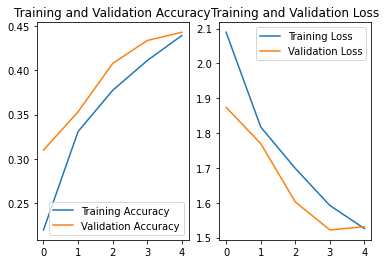

In [48]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense, \
    GlobalAveragePooling2D
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class ConvBNRelu(Model):
    def __init__(self, ch, kernelsz=3, strides=1, padding='same'):
        # 定义了默认卷积核边长是3步长为1全零填充
        super(ConvBNRelu, self).__init__()
        self.model = tf.keras.models.Sequential([
            Conv2D(ch, kernelsz, strides=strides, padding=padding),
            BatchNormalization(),
            Activation('relu')
        ])

    def call(self, x):
        x = self.model(x, training=False) #在training=False时，BN通过整个训练集计算均值、方差去做批归一化，training=True时，通过当前batch的均值、方差去做批归一化。推理时 training=False效果好
        return x


class InceptionBlk(Model):
    def __init__(self, ch, strides=1):
        super(InceptionBlk, self).__init__()
        self.ch = ch
        self.strides = strides
        self.c1 = ConvBNRelu(ch, kernelsz=1, strides=strides)
        self.c2_1 = ConvBNRelu(ch, kernelsz=1, strides=strides)
        self.c2_2 = ConvBNRelu(ch, kernelsz=3, strides=1)
        self.c3_1 = ConvBNRelu(ch, kernelsz=1, strides=strides)
        self.c3_2 = ConvBNRelu(ch, kernelsz=5, strides=1)
        self.p4_1 = MaxPool2D(3, strides=1, padding='same')
        self.c4_2 = ConvBNRelu(ch, kernelsz=1, strides=strides)

    def call(self, x):
        x1 = self.c1(x)
        x2_1 = self.c2_1(x)
        x2_2 = self.c2_2(x2_1)
        x3_1 = self.c3_1(x)
        x3_2 = self.c3_2(x3_1)
        x4_1 = self.p4_1(x)
        x4_2 = self.c4_2(x4_1)
        # concat along axis=channel
        x = tf.concat([x1, x2_2, x3_2, x4_2], axis=3)
        return x


class Inception10(Model):
    def __init__(self, num_blocks, num_classes, init_ch=16, **kwargs):
        super(Inception10, self).__init__(**kwargs)
        self.in_channels = init_ch
        self.out_channels = init_ch
        self.num_blocks = num_blocks
        self.init_ch = init_ch

        # 第一层采用16个3*3卷积核，步长为1，全零填充，BN操作，rule激活。
        # 设定了默认init_ch=16,默认输出深度是16，
        # 定义ConvBNRe lu类的时候，默认卷积核边长是3步长为1全零填充，所以直接调用
        self.c1 = ConvBNRelu(init_ch)

        # 每个bIock中的第一个Inception结构块，卷积步长是2，
        # 第二个Inception结构块，卷积步长是1，
        self.blocks = tf.keras.models.Sequential()
        for block_id in range(num_blocks):
            for layer_id in range(2):
                if layer_id == 0:
                    block = InceptionBlk(self.out_channels, strides=2)
                else:
                    block = InceptionBlk(self.out_channels, strides=1)
                self.blocks.add(block)
            # enlarger out_channels per block

            # 给通道数加倍了，所以block_1通道数是block_0通道数的两倍是32
            self.out_channels *= 2

        self.p1 = GlobalAveragePooling2D()  # 128个通道的数据会被送入平均池化
        self.f1 = Dense(num_classes, activation='softmax')  # 送入10个分类的全连接。

    def call(self, x):
        x = self.c1(x)
        x = self.blocks(x)
        x = self.p1(x)
        y = self.f1(x)
        return y

# num_blocks指定inceptionNet的Block数是2，block_0和block_1;
# num_classes指定网络10分类
model = Inception10(num_blocks=2, num_classes=10)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/Inception10.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=1024, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights/Inception10.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### ResNet

ResNet诞生于2015年，当年ImageNet竞赛冠军，Top5错 误率为3.57%，ResNet提出了层间残差跳连，引入了前方信息，缓解梯度消失，使神经网络层数增加成为可能，我们总览刚刚讲过的四个卷积网络层数，网络层数加深提高识别准确率

| 模型名称     | 网络层数 |
| ------------ | -------- |
| LetNet       | 5        |
| AlexNet      | 8        |
| VGG          | 16/19    |
| InceptionNet | 22       |

​		可见人们在探索卷积实现特征提取的道路上,通过加深网络层数，取得了越来越好的效果。

​		ResNet的作者何凯明在cifar10数据集上做了个实验，他发现56层卷积网络的错误率，要高于20层卷积网络的错误率，他认为单纯堆叠神经网络层数会使神经网络模型退化，以至于后边的特征丢失了前边特征的原本模样。

​		于是他用了一根跳连线，将前边的特征直接接到了后边，使这里的输出结果H(x)，包含了堆叠卷积的非线性输出F (x)，和跳过这两层堆叠卷积直接连接过来的恒等映射x，让他们对应元素相加，这一操作有效缓解了神经网络模型堆叠导致的退化，使得神经网络可以向着更深层级发展。

![image-20200601190032146](tensorflow2.assets/image-20200601190032146.png)

注意，ResNet块中的"+"与Inception块中的"+”是不同的

- Inception块中的“+”是沿深度方向叠加(千层蛋糕层数叠加)
- ResNet块中的“+”是特征图对应元素值相加(矩阵值相加)

ResNet块中有两种情况

一种情况用图中的实线表示，这种情况两层堆叠卷积没有改变特征图的维度，也就它们特征图的个数、高、宽和深度都相同，可以直接将 $F(x)$与 $x$ 相加。

另一种情用图中的處线表示，这种情况中这两层堆叠卷积改变了特征图的维度，需要借助1*1的卷积来调整x的维度，使W (x)与F (x)的维度一致。

![image-20200601190048195](tensorflow2.assets/image-20200601190048195.png)

`1*1`卷积操作可通过步长改变特征图尺寸，通过卷积核个数改特征图深度。

​		ResNet块有两种形式，一种堆叠前后维度相同，另一堆叠前后维度不相同，将ResNet块的两种结构封装到一个橙色块中，定义一个ResNetBlock类，每调用一次ResNetBlock类，会生成一个黄色块。

![image-20200527163751257](tensorflow2.assets/image-20200527163751257.png)

​		如果堆叠卷积层前后维度不同，residual_path等 于1,调用红色块中的代码，使用`1*1`卷积操作，调整输入特征图inputs的尺寸或深度后，将堆叠卷积输出特征y，和if语句计算歌的residual相加、过激活、输出。

​		如果堆叠卷积层前后维度相同，不执行红色块内代码，直接将堆叠卷积输出特征y和输入特征图inputs相加、过激活、输出。

![image-20200527164005752](tensorflow2.assets/image-20200527164005752.png)

搭建网络结构，ResNet18的第一层是个卷积，然后是8个ResNet块，最后是一层全连接，每一个ResNet块有两层卷积，一共是18层网络。

第一层：采用64和3*3卷积核，步长为1，全零填充，采用BN操作，rule激活，图中代码紫色块。

​		下面的结果描述四个橙色块，第一个橙色快是两条实线跳连的ResNet块，第二三四个橙色快，先虚线再实线跳连的ResNet块，用for循环实现，循环次数由参赛列表元素个数决定，这里列表赋值是2,2,2,2四个元素，最外层for循环执行四次，每次进入循环，根据当前是第几个元素，选择residual_path=True，用虚线连接，residual_path=False，用实线连接，调用ReshetBlock生成左边ResNet18结构中的一个橙色块，经过平均池化和全连接，得到输出结果

完整代码



Epoch 1/5
1563/1563 [==============================] - 1178s 753ms/step - loss: 1.3469 - sparse_categorical_accuracy: 0.5599 - val_loss: 1.2683 - val_sparse_categorical_accuracy: 0.5738
Epoch 2/5
1563/1563 [==============================] - 1148s 735ms/step - loss: 0.8114 - sparse_categorical_accuracy: 0.7352 - val_loss: 0.8500 - val_sparse_categorical_accuracy: 0.7149
Epoch 3/5
1563/1563 [==============================] - 1181s 756ms/step - loss: 0.6213 - sparse_categorical_accuracy: 0.7987 - val_loss: 0.8813 - val_sparse_categorical_accuracy: 0.7132
Epoch 4/5
1563/1563 [==============================] - 1248s 799ms/step - loss: 0.4993 - sparse_categorical_accuracy: 0.8406 - val_loss: 0.9432 - val_sparse_categorical_accuracy: 0.7218
Epoch 5/5
1563/1563 [==============================] - 1208s 773ms/step - loss: 0.3919 - sparse_categorical_accuracy: 0.8767 - val_loss: 0.6365 - val_sparse_categorical_accuracy: 0.8085
Model: "res_net18"
___________________________________________________

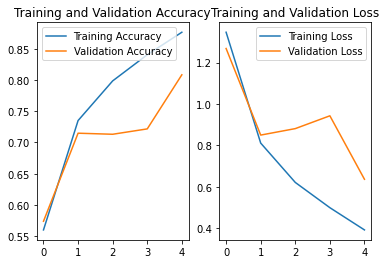

In [49]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class ResnetBlock(Model):

    def __init__(self, filters, strides=1, residual_path=False):
        super(ResnetBlock, self).__init__()
        self.filters = filters
        self.strides = strides
        self.residual_path = residual_path

        self.c1 = Conv2D(filters, (3, 3), strides=strides, padding='same', use_bias=False)
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')

        self.c2 = Conv2D(filters, (3, 3), strides=1, padding='same', use_bias=False)
        self.b2 = BatchNormalization()

        # residual_path为True时，对输入进行下采样，即用1x1的卷积核做卷积操作，保证x能和F(x)维度相同，顺利相加
        if residual_path:
            self.down_c1 = Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)
            self.down_b1 = BatchNormalization()
        
        self.a2 = Activation('relu')

    def call(self, inputs):
        residual = inputs  # residual等于输入值本身，即residual=x
        # 将输入通过卷积、BN层、激活层，计算F(x)
        x = self.c1(inputs)
        x = self.b1(x)
        x = self.a1(x)

        x = self.c2(x)
        y = self.b2(x)

        if self.residual_path:
            residual = self.down_c1(inputs)
            residual = self.down_b1(residual)

        out = self.a2(y + residual)  # 最后输出的是两部分的和，即F(x)+x或F(x)+Wx,再过激活函数
        return out


class ResNet18(Model):

    def __init__(self, block_list, initial_filters=64):  # block_list表示每个block有几个卷积层
        super(ResNet18, self).__init__()
        self.num_blocks = len(block_list)  # 共有几个block
        self.block_list = block_list
        self.out_filters = initial_filters
        
        # 第一层
        self.c1 = Conv2D(self.out_filters, (3, 3), strides=1, padding='same', use_bias=False)
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')

        self.blocks = tf.keras.models.Sequential()
        # 构建ResNet网络结构
        for block_id in range(len(block_list)):  # 第几个resnet block
            for layer_id in range(block_list[block_id]):  # 第几个卷积层

                if block_id != 0 and layer_id == 0:  # 对除第一个block以外的每个block的输入进行下采样
                    block = ResnetBlock(self.out_filters, strides=2, residual_path=True)
                else:
                    block = ResnetBlock(self.out_filters, residual_path=False)
                self.blocks.add(block)  # 将构建好的block加入resnet
            self.out_filters *= 2  # 下一个block的卷积核数是上一个block的2倍
        self.p1 = tf.keras.layers.GlobalAveragePooling2D()
        self.f1 = tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())

    def call(self, inputs):
        x = self.c1(inputs)
        x = self.b1(x)
        x = self.a1(x)
        x = self.blocks(x)
        x = self.p1(x)
        y = self.f1(x)
        return y


model = ResNet18([2, 2, 2, 2])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/ResNet18.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights/ResNet18.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### 经典卷积网络小结

![image-20200601190105495](tensorflow2.assets/image-20200601190105495.png)

## 卷积神经网络总结

卷积是什么？卷积就是特征提取器，就是CBAPD

卷积神经网络：借助卷积核提取空间特征后，送入全连接网络

![image-20200601185414984](tensorflow2.assets/image-20200601185414984.png)

这种特征提取是借助卷积核实现的参数空间共享，通过卷积计算层提取空间信息。例如，我们可以用卷积核提取一张图片的空间特征，再把提取到的空间特征送入全连接网络，实现离散数据的分类

# 六、循环神经网络

本讲将使用循环神经网络实现连续数据的预测



## 循环核

循环核：参数时间共享，循环层提取时间信息。

循环核具有记忆力，通过不同时刻的参数共享，实现了对时间序列的信息提取。

循环核示意：有圆柱体是记忆体，记忆体下面、侧面、上面分别有三组待训练的参数矩阵。

![image-20200601190156015](tensorflow2.assets/image-20200601190156015.png)

​		中间圆柱体是记忆体，可以设定个数，改变记忆容量，当记忆体个数被指定，输入$x_t$、输出$y_t$维度被指定，周围这些待训练参数的维度也就被限定了。

​		记忆体内存储着每个时刻的状态信息$h_t$，记忆体当前时刻存储的状态信息$h_t$等于，当前时刻的输入特征$x_t$乘以矩阵$w_{xh}$，加上记忆体上一时刻存储的状态信息$h_{t-1}$乘以矩阵$w_{hh}$，再加上偏置项$b_h$，他们的和过tanh激活函数

$$
h_{t}=\tanh \left(x_{t} w_{x h}+h_{t-1} w_{h h}+b h\right)
$$

​		当前时刻循环核的输出特征 $y_t$ 等于，记忆体内存储的状态信息$h_t$乘以矩阵$w_{hy}$，再加上偏置项$b_y$，过softmax激活函数

$$
\mathrm{y}_{t}=\operatorname{softmax}\left(h_{t} w_{h y}+b y\right)
$$

其实这就是一层全连接

前向传播时：记忆体内存储的状态信息$h_t$，在每个时刻都被刷新，三个参数矩阵$w_{xh}$、$w_{hh}$、$w_{hy}$自始至终都是固定不变的。

反向传播时:三个参数矩阵$w_{xh}$、$w_{hh}$、$w_{hy}$被梯度下降法更新。



## 循环核按时间步展开

按照时间步展开就是把循环核按照时间轴方向展开，可以表示为下图所示

![image-20200601174602576](tensorflow2.assets/image-20200601174602576.png)

​		每个时刻记忆体状态信息 $h_t$ 被刷新，记忆体周围的参数矩阵$w_{xh}$、$w_{hh}$、$w_{hy}$是固定不变的，我们训练优化的就是这些参数矩阵，训练完成后，使用效果最好的参数矩阵，执行前向传播，输出预测结果。

​		输入几个样本才能得出结果，那就要循环几次。例如输入1，2，3，4得出5，那么就要循环核按时间展开4次。

​		其实这和我们人类的预测是一致的，你脑中的记忆体每个时刻都根据当前的输入而更新，当前的预测推理是根据你以往的知识积累，用固化下来的参数矩阵进行的推理判断。

循环神经网络：借助循环核提取时间特征后，送入全连接网络，实现连续数据的预测。

​		$y_t$ 是整个循环网络的末层，从公式来看，就是一个全连接网络，借助全连接网络实现连续数据预测。



## 循环核计算层

​		每个循环核构成一层循环计算层，循环计算层的层数是向输出方向增长的

![image-20200601174624312](tensorflow2.assets/image-20200601174624312.png)

他们中的每个循环核中记忆体的个数是根据你的需求任意指定的

## TF描述循环计算层

Tensorflow提供了计算循环层的函数

```python
tf.keras.layers.SimpleRNN(记忆体个数，activation = '激活函数',
return_sequences = 是否每个时刻输出ht到下一层)
```

- `activation = '激活函数'` (不写， 默认使用tanh)
- `return_sequences = True`  各时间步都输出 $h_t$
- `return_sequences = False` 仅最后时间步输出 $h_t$ (默认)。
- 一般最后一层的循环核用False，仅在最后一个时间步输出 $h_t$ ；中间的层循环核用True，每个时间步都把 $h_t$ 输出给下一层。

例如，定义了一个具有三个记忆体的循环核，这个循环核会在每个时间步输出 $h_t$

```
SimpleRNN(3, return_sequences= True)
```

`return_sequences = True`循环核各时刻会把 $h_t$ 推送到到下一层。循环核在每个时间步输出 $h_t$ 可以用这张图表示

![image-20200601190214013](tensorflow2.assets/image-20200601190214013.png)

return_sequences= False循环核仅在最后一个时刻把 $h_t$ 推送到到下一层，中间的时间步循环核没有输出 $h_t$。

![image-20200601190222169](tensorflow2.assets/image-20200601190222169.png)

❗注意：API对送入循环层的数据维度是有要求的，要求送入循环层的数据是三维的，第一维是送入样本的总数量，第二维是循环核按时间展开的步数，第三维是每个时间步输入特征的个数。

送入RNN时，
x_train维度：``[送入样本数，循环核时间展开步数，每个时间步输入特征个数]``

例如：一共要送入RNN层两组数据，每组数据经过一个时间步就会得到输出结果，每个时间步送入三个数值，输入循环层的数据维度就是 ``[2, 1, 3]``。

![image-20200601190402923](tensorflow2.assets/image-20200601190402923.png)

例如：只有一组数据，分四个时间步送入循环层，每个时间步送入两个数值，输入循环层的数据维度就是``[1,4,2]``

![image-20200601190414387](tensorflow2.assets/image-20200601190414387.png)



## 循环网络计算过程

字母预测:输入 a 预测出 b, 输入 b 预测出 c，输入 c 预测出 d,输入 d 预测出 e, 输入 e 预测出 a。

神经网络的输入都是数字，所以我们先要把用到的 a、b、c、d、e 这五个字母，用数字表示。最简单直接的方法就是用独热码对这五个字母编码。

![image-20200528160953368](tensorflow2.assets/image-20200528160953368.png)

随机生成了$W_{xh}$、$W_{hh}$ 和 $W_{hy}$ 三个参数矩阵，记忆体的个数为3，初始状态 $h_t$ 为``[0.0 0.0 0.0]``

当前输入 $x_t$ ``[0,1,0,0,0]`` 乘以黄色的参数矩阵 $w_{xh}$，得到``[-2.3 0.8 1.1]``，上一时刻也就是最开始时，记忆体状态信息等于 0，所以加上 0，再加上偏置矩阵 $b_h$ 是 ``[0.5 0.3 -0. 2]``，求和之后是``[-1.8 1.1 0. 9]``

<img src="tensorflow2.assets/循环网络计算过程.png" alt="循环网络计算过程" style="zoom:67%;" />

$$
\begin{aligned}
\mathrm{h}_{t} &=\tanh \left(x_{t} w_{x h}+h_{t-1} \mathrm{w}_{h h}+\mathrm{b_h}\right) \\
&=\tanh ([-2.3 \quad 0.8 \quad 1.1]+0+[0.5\quad 0.3 \quad-0.2]) \\
&=\tanh [-1.8 \quad 1.1 \quad 0.9]
\end{aligned}
$$

过tanh激活函数后，得到当前时刻的状态信息 $h_t$，记忆体存储的状态信息被刷新为``[-0.9 0.8 0.7]``，这个过程可以理解为，脑中的记忆因为当前输入的事物而更新了。

<img src="tensorflow2.assets/过tanh激活.png" alt="过tanh激活" style="zoom: 67%;" />

$$
\begin{aligned}
\mathrm{h}_{t} &=\tanh \left(x_{t} w_{x h}+h_{t-1} \mathrm{w}_{h h}+\mathrm{b_h}\right) \\
&=\tanh ([-2.3 \quad 0.8 \quad 1.1]+0+[0.5\quad0.3\quad-0.2]) \\
&=\tanh [-1.8 \quad 1.1 \quad 0.9]=[-0.9 \quad 0.8 \quad 0.7]
\end{aligned}
$$

注：$tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$

输出 $y_t$ 是把提取到的时间信息，通过全连接进行识别预测的过程，是整个网络的输出层，ht是当前记忆体内的数值``[-0.9 0. 8 0. 7]``，乘以这个绿色的参数矩阵 $w_{hy}$，加上偏置矩阵 $b_y$，得到 ``[-0.7 -0.5 3.3 0.0 -0.7]``，过 softmax 函数得到 ``[0.02 0.02 0.91 0.03 0. 02]``，可见模型认为有 91% 的可能性输出字母c，所以循环网络输出了预测结果c。

$$
\begin{aligned}
\mathrm{y}_{t}=& \operatorname{softmax}\left(h_{t} w_{h y}+b y\right) \\
=& \operatorname{softmax}([-0.7\quad-0.6\quad2.9\quad0.7\quad-0.8]+[0.0 \quad 0.1 \quad 0.4 \quad-0.7\quad0.1]) \\
&=\operatorname{softmax}([-0.7 \quad- 0.5 \quad 3.3 \quad0.0\quad-0.7]) \\
&=[0.02 \quad 0.02 \quad 0.91 \quad 0.03 \quad 0.02]
\end{aligned}
$$

代码示例:

```python
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
import os

input_word = "abcde"
w_to_id = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}  # 单词映射到数值id的词典
id_to_onehot = {0: [1., 0., 0., 0., 0.], 1: [0., 1., 0., 0., 0.], 2: [0., 0., 1., 0., 0.], 3: [0., 0., 0., 1., 0.], 4: [0., 0., 0., 0., 1.]}  # id编码为one-hot

x_train = [id_to_onehot[w_to_id['a']], id_to_onehot[w_to_id['b']], id_to_onehot[w_to_id['c']],
           id_to_onehot[w_to_id['d']], id_to_onehot[w_to_id['e']]]
y_train = [w_to_id['b'], w_to_id['c'], w_to_id['d'], w_to_id['e'], w_to_id['a']]

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

# 使x_train符合SimpleRNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
# 此处整个数据集送入，送入样本数为len(x_train)；输入1个字母出结果，循环核时间展开步数为1; 表示为独热码有5个输入特征，每个时间步输入特征个数为5
x_train = np.reshape(x_train, (len(x_train), 1, 5))
y_train = np.array(y_train)

model = tf.keras.Sequential([
    SimpleRNN(3),  # 搭建具有三个记忆体的循环层，3是任意取的数字，超参数
    Dense(5, activation='softmax')  # Dense层就是一层全连接，它实现了输出层yt的计算
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/rnn_onehot_1pre1.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='loss')  
# 由于fit没有给出测试集，不计算测试集准确率，根据loss，保存最优模型

history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])

model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

############### predict #############

preNum = int(input("input the number of test alphabet:"))
for i in range(preNum):
    alphabet1 = input("input test alphabet:")
    alphabet = [id_to_onehot[w_to_id[alphabet1]]]
    # 使alphabet符合SimpleRNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
    # 此处验证效果送入了1个样本，送入样本数为1；输入1个字母出结果，所以循环核时间展开步数为1; 
    # 表示为独热码有5个输入特征，每个时间步输入特征个数为5
    alphabet = np.reshape(alphabet, (1, 1, 5))
    result = model.predict([alphabet])
    pred = tf.argmax(result, axis=1)
    # tf.argmax(input,axis)根据axis取值的不同返回每行或者每列最大值的索引
    pred = int(pred)
    tf.print(alphabet1 + '->' + input_word[pred])
```

## 循环计算过程 Ⅱ

​ 把时间核按时间步展开，连续输入多个字母预测下一个字母的例子，以连续输入四个字母预测下一个字母为例。说明循环核按时间展开后，循环计算过程。

​ 仍然使用三个记忆体，初始时刻记忆体内的记忆是0，用一套训练好的参数矩阵，说明循环计算的前向传播过程，在这个过程中的每个时刻参数矩阵是固定的，记忆体会在每个时刻被更新。

![image-20200528180457064](tensorflow2.assets/image-20200528180457064.png)

- 在第一个时刻b的独热码``[0, 1,0, 0, 0]``输入，记忆体根据更新公式刷新为``[-0.9  0.2  0.2]``
- 第二时刻c的独热码``[0, 0,1,0, 0]``输入，记忆体根据更新公式刷新为``[0.8  1.0  0.8]``
- 在第三时刻d的独热码``[0, 0, 0, 1,0]``输入，记忆体根据更新公式刷新为``[0.6  0.5  -1.0]``
- 在第四时刻e的独热码``[0, 0, 0,0, 1]``输入，记忆体根据更新公式刷新为``[-1.0  -1.0 0.8]``

​ 这四个时间步中，所用到的参数矩阵 $w_xh$ 和偏置项 $b_h$ 数值是相同的，输出预测通过全连接完成，带入 $y_t$ 计算公式得到``[0.71 0.14 0.10 0.05 0.00]``，说明有 71% 的可能是字母 a。

​ 观察输出结果，模型不仅成功预测出了下一个字母是a，从神经网络输出的概率可以发现，因为输入序列的最后一个字母是 e，模型认为下一个字母还是e的可能性最小，可能性最大的是 a，其次分别是 b, c, d。

用RNN实现输入连续四个字母，预测下一个字母(One hot编码)

- 输入abcd输出e
- 输入bcde输出a
- 输入cdea输出b
- 输入deab输出c
- 输入eabc输出d

代码示例

-------------load the model-----------------
Epoch 1/100
1/1 [==============================] - 0s 481ms/step - loss: 0.0091 - sparse_categorical_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0090 - sparse_categorical_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0090 - sparse_categorical_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0090 - sparse_categorical_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0090 - sparse_categorical_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0090 - sparse_categorical_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0089 - sparse_categorical_accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0089 - sparse_categorical_accuracy: 1.0000
Epoch 9/100
1/1 [========

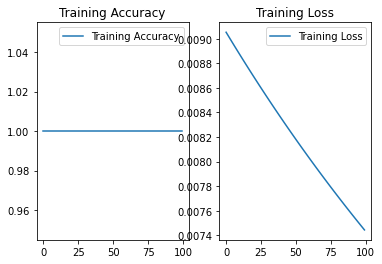

input the number of test alphabet:1
input test alphabet:bcde
Consider rewriting this model with the Functional API.
bcde->a


In [50]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
import os

input_word = "abcde"
w_to_id = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}  # 单词映射到数值id的词典
id_to_onehot = {0: [1., 0., 0., 0., 0.], 1: [0., 1., 0., 0., 0.], 2: [0., 0., 1., 0., 0.], 3: [0., 0., 0., 1., 0.],
                4: [0., 0., 0., 0., 1.]}  # id编码为one-hot

# 这里和 I  中的区别是，这里每次喂入 4 个字母的独热编码
x_train = [
    [id_to_onehot[w_to_id['a']], id_to_onehot[w_to_id['b']], id_to_onehot[w_to_id['c']], id_to_onehot[w_to_id['d']]],
    [id_to_onehot[w_to_id['b']], id_to_onehot[w_to_id['c']], id_to_onehot[w_to_id['d']], id_to_onehot[w_to_id['e']]],
    [id_to_onehot[w_to_id['c']], id_to_onehot[w_to_id['d']], id_to_onehot[w_to_id['e']], id_to_onehot[w_to_id['a']]],
    [id_to_onehot[w_to_id['d']], id_to_onehot[w_to_id['e']], id_to_onehot[w_to_id['a']], id_to_onehot[w_to_id['b']]],
    [id_to_onehot[w_to_id['e']], id_to_onehot[w_to_id['a']], id_to_onehot[w_to_id['b']], id_to_onehot[w_to_id['c']]],
]
y_train = [w_to_id['e'], w_to_id['a'], w_to_id['b'], w_to_id['c'], w_to_id['d']]

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

# 使x_train符合SimpleRNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
# 此处整个数据集送入，送入样本数为len(x_train)；输入4个字母出结果，循环核时间展开步数为4; 表示为独热码有5个输入特征，每个时间步输入特征个数为5
x_train = np.reshape(x_train, (len(x_train), 4, 5))
y_train = np.array(y_train)

model = tf.keras.Sequential([
    SimpleRNN(3),
    Dense(5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/rnn_onehot_4pre1.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='loss')  # 由于fit没有给出测试集，不计算测试集准确率，根据loss，保存最优模型

history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])

model.summary()

# print(model.trainable_variables)
file = open('./weights/SimpleRNN.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

############### predict #############

preNum = int(input("input the number of test alphabet:"))
for i in range(preNum):
    alphabet1 = input("input test alphabet:")
    alphabet = [id_to_onehot[w_to_id[a]] for a in alphabet1]
    # 使alphabet符合SimpleRNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
    # 此处验证效果送入了1个样本，送入样本数为1；输入4个字母出结果，所以循环核时间展开步数为4;
    # 表示为独热码有5个输入特征，每个时间步输入特征个数为5
    alphabet = np.reshape(alphabet, (1, 4, 5))
    result = model.predict([alphabet])
    pred = tf.argmax(result, axis=1)
    pred = int(pred)
    tf.print(alphabet1 + '->' + input_word[pred])

## Embedding编码

​ 独热码的位宽要与词汇量一致，如果词汇量增大时，非常浪费资源。

​ 因此自然语言处理中，有专门一个方向在研究单词的编码，Embedding是一种编码方法，用低维向量实现了编码，这种编码可以通过神经网络训练优化，能表达出单词间的相关性。

- 独热码:数据量大过于稀疏，映射之间是独立的，没有表现出关联性。
- Embedding:是一种单词编码方法，用低维向量实现了编码，这种编码通过神经网络训练优化，能表达出单词间的相关性。

Tensorflow中给出了Embedding实现编码的函数

```python
tf.keras.layers.Embedding(词汇表大小,编码维度)
```

- 词汇表大小：编码一共要表示多少个单词
- 编码维度：打算用几个数字表示一个单词

例如：想表示1到100这100个自然数，词汇表大小就是100，每个自然数用三个数字表示，编码维度就是3，所以Embedding层的参数是100和3

```python
tf.keras.layers.Embedding(100, 3)
```

Embedding层对输入数据的维度也有要求，要求输入数据是二维的，第一-维度告知送入几个样本，第二维度告知循环核时间展开步数

``[送入样本数，循环核时间展开步数]``

### 预测单个字母

用RNN实现输入一个字母，预测下一个字母，用Embedding编码替换独热码

代码示例

-------------load the model-----------------
Epoch 1/100
1/1 [==============================] - 1s 529ms/step - loss: 0.0136 - sparse_categorical_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0136 - sparse_categorical_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0135 - sparse_categorical_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0135 - sparse_categorical_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0134 - sparse_categorical_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0134 - sparse_categorical_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0133 - sparse_categorical_accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0132 - sparse_categorical_accuracy: 1.0000
Epoch 9/100
1/1 [========

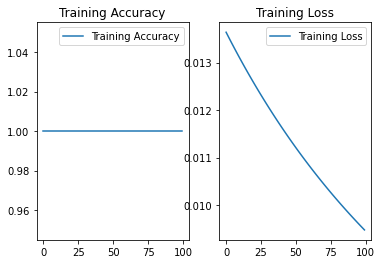

input the number of test alphabet:1
input test alphabet:c
c->d


In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding
import matplotlib.pyplot as plt
import os

input_word = "abcde"
w_to_id = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}  # 单词映射到数值id的词典

x_train = [w_to_id['a'], w_to_id['b'], w_to_id['c'], w_to_id['d'], w_to_id['e']]
y_train = [w_to_id['b'], w_to_id['c'], w_to_id['d'], w_to_id['e'], w_to_id['a']]

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

# 使x_train符合Embedding输入要求：[送入样本数， 循环核时间展开步数] ，
# 此处整个数据集送入所以送入，送入样本数为len(x_train)；输入1个字母出结果，循环核时间展开步数为1。
x_train = np.reshape(x_train, (len(x_train), 1))
y_train = np.array(y_train)

model = tf.keras.Sequential([
    Embedding(5, 2), # 先对输入数据进行编码,
    # 这一层会生成一个五行两列的可训练参数矩阵,实现编码可训练
    SimpleRNN(3),  # 随后设定具有三个记忆体的循环层
    Dense(5, activation='softmax')  # 设定全连接Dense层实现了输出层y的全连接计算
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/run_embedding_1pre1.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='loss')  # 由于fit没有给出测试集，不计算测试集准确率，根据loss，保存最优模型

history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])

model.summary()

# print(model.trainable_variables)
file = open('./weights/SimpleRNN2.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

############### predict #############

preNum = int(input("input the number of test alphabet:"))
for i in range(preNum):
    alphabet1 = input("input test alphabet:")
    alphabet = [w_to_id[alphabet1]]
    # 使alphabet符合Embedding输入要求：[送入样本数， 循环核时间展开步数]。
    # 此处验证效果送入了1个样本，送入样本数为1；输入1个字母出结果，循环核时间展开步数为1。
    alphabet = np.reshape(alphabet, (1, 1))
    result = model.predict(alphabet)
    pred = tf.argmax(result, axis=1)
    pred = int(pred)
    tf.print(alphabet1 + '->' + input_word[pred])

### 多个字母预测单个字母

用RNN实现输入连续四个字母，预测下一个字母

代码示例

-------------load the model-----------------
Epoch 1/100
1/1 [==============================] - 1s 564ms/step - loss: 0.0371 - sparse_categorical_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0367 - sparse_categorical_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0364 - sparse_categorical_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0360 - sparse_categorical_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0357 - sparse_categorical_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0354 - sparse_categorical_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0351 - sparse_categorical_accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0347 - sparse_categorical_accuracy: 1.0000
Epoch 9/100
1/1 [========

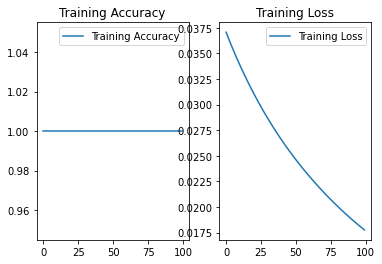

input the number of test alphabet:1
input test alphabet:cdef
cdef->g


In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding
import matplotlib.pyplot as plt
import os

input_word = "abcdefghijklmnopqrstuvwxyz"
w_to_id = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4,
           'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9,
           'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14,
           'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19,
           'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}  # 单词映射到数值id的词典

training_set_scaled = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                       11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                       21, 22, 23, 24, 25]

x_train = []
y_train = []

for i in range(4, 26):
    x_train.append(training_set_scaled[i - 4:i])
    y_train.append(training_set_scaled[i])

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

# 使x_train符合Embedding输入要求：[送入样本数， 循环核时间展开步数] ，
# 此处整个数据集送入所以送入，送入样本数为len(x_train)；输入4个字母出结果，循环核时间展开步数为4。
x_train = np.reshape(x_train, (len(x_train), 4))
y_train = np.array(y_train)

model = tf.keras.Sequential([
    Embedding(26, 2),
    SimpleRNN(10),
    Dense(26, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/rnn_embedding_4pre1.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='loss')  # 由于fit没有给出测试集，不计算测试集准确率，根据loss，保存最优模型

history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])

model.summary()

file = open('./weights/SimpleRNN3.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

################# predict ##################

preNum = int(input("input the number of test alphabet:"))
for i in range(preNum):
    alphabet1 = input("input test alphabet:")
    alphabet = [w_to_id[a] for a in alphabet1]
    # 使alphabet符合Embedding输入要求：[送入样本数， 时间展开步数]。
    # 此处验证效果送入了1个样本，送入样本数为1；输入4个字母出结果，循环核时间展开步数为4。
    alphabet = np.reshape(alphabet, (1, 4))
    result = model.predict([alphabet])
    pred = tf.argmax(result, axis=1)
    pred = int(pred)
    tf.print(alphabet1 + '->' + input_word[pred])

## RNN实现股票预测

用连续60天的开盘价，预测第61天的开盘价

-------------load the model-----------------
Epoch 1/50
33/33 [==============================] - 2s 27ms/step - loss: 7.0110e-04 - val_loss: 0.0019
Epoch 2/50
33/33 [==============================] - 1s 20ms/step - loss: 7.0558e-04 - val_loss: 0.0059
Epoch 3/50
33/33 [==============================] - 1s 18ms/step - loss: 6.7943e-04 - val_loss: 0.0020
Epoch 4/50
33/33 [==============================] - 1s 19ms/step - loss: 7.0104e-04 - val_loss: 0.0047
Epoch 5/50
33/33 [==============================] - 1s 18ms/step - loss: 6.3099e-04 - val_loss: 0.0028
Epoch 6/50
33/33 [==============================] - 1s 19ms/step - loss: 7.4746e-04 - val_loss: 0.0015
Epoch 7/50
33/33 [==============================] - 1s 20ms/step - loss: 7.1103e-04 - val_loss: 9.1967e-04
Epoch 8/50
33/33 [==============================] - 1s 19ms/step - loss: 6.7581e-04 - val_loss: 0.0044
Epoch 9/50
33/33 [==============================] - 1s 18ms/step - loss: 6.8043e-04 - val_loss: 0.0053
Epoch 10/50
33/33 [=====

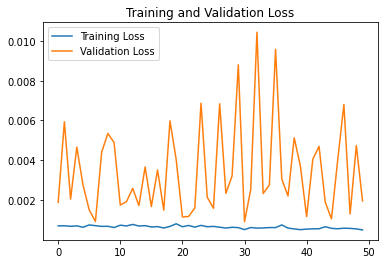

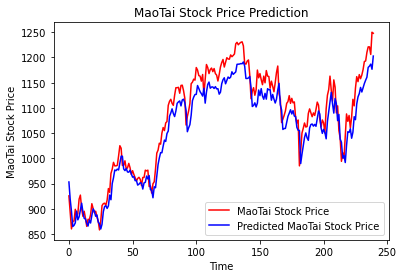

均方误差: 981.510000
均方根误差: 31.329060
平均绝对误差: 26.829858


In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, SimpleRNN
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

maotai = pd.read_csv('./data/SH600519.csv')  # 读取股票文件

training_set = maotai.iloc[0:2426 - 300, 2:3].values  # 前(2426-300=2126)天的开盘价作为训练集,表格从0开始计数，2:3 是提取[2:3)列，前闭后开,故提取出C列开盘价
test_set = maotai.iloc[2426 - 300:, 2:3].values  # 后300天的开盘价作为测试集

# 归一化
sc = MinMaxScaler(feature_range=(0, 1))  # 定义归一化：归一化到(0，1)之间
training_set_scaled = sc.fit_transform(training_set)  # 求得训练集的最大值，最小值这些训练集固有的属性，并在训练集上进行归一化
test_set = sc.transform(test_set)  # 利用训练集的属性对测试集进行归一化

x_train = []
y_train = []

x_test = []
y_test = []

# 测试集：csv表格中前2426-300=2126天数据
# 利用for循环，遍历整个训练集，提取训练集中连续60天的开盘价作为输入特征x_train，第61天的数据作为标签，for循环共构建2426-300-60=2066组数据。
for i in range(60, len(training_set_scaled)):
    x_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])
# 对训练集进行打乱
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)
# 将训练集由list格式变为array格式
x_train, y_train = np.array(x_train), np.array(y_train)

# 使x_train符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
# 此处整个数据集送入，送入样本数为x_train.shape[0]即2066组数据；输入60个开盘价，预测出第61天的开盘价，循环核时间展开步数为60; 每个时间步送入的特征是某一天的开盘价，只有1个数据，故每个时间步输入特征个数为1
x_train = np.reshape(x_train, (x_train.shape[0], 60, 1))
# 测试集：csv表格中后300天数据
# 利用for循环，遍历整个测试集，提取测试集中连续60天的开盘价作为输入特征x_train，第61天的数据作为标签，for循环共构建300-60=240组数据。
for i in range(60, len(test_set)):
    x_test.append(test_set[i - 60:i, 0])
    y_test.append(test_set[i, 0])
# 测试集变array并reshape为符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], 60, 1))

model = tf.keras.Sequential([
    SimpleRNN(80, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(100),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mean_squared_error')  # 损失函数用均方误差
# 该应用只观测loss数值，不观测准确率，所以删去metrics选项，一会在每个epoch迭代显示时只显示loss值

checkpoint_save_path = "./checkpoint/rnn_stock.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='val_loss')

history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])

model.summary()

file = open('./weights/RNN_stock.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

################## predict ######################
# 测试集输入模型进行预测
predicted_stock_price = model.predict(x_test)
# 对预测数据还原---从（0，1）反归一化到原始范围
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# 对真实数据还原---从（0，1）反归一化到原始范围
real_stock_price = sc.inverse_transform(test_set[60:])
# 画出真实数据和预测数据的对比曲线
plt.plot(real_stock_price, color='red', label='MaoTai Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted MaoTai Stock Price')
plt.title('MaoTai Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MaoTai Stock Price')
plt.legend()
plt.show()

##########evaluate##############
# calculate MSE 均方误差 ---> E[(预测值-真实值)^2] (预测值减真实值求平方后求均值)
mse = mean_squared_error(predicted_stock_price, real_stock_price)
# calculate RMSE 均方根误差--->sqrt[MSE]    (对均方误差开方)
rmse = math.sqrt(mean_squared_error(predicted_stock_price, real_stock_price))
# calculate MAE 平均绝对误差----->E[|预测值-真实值|](预测值减真实值求绝对值后求均值）
mae = mean_absolute_error(predicted_stock_price, real_stock_price)
print('均方误差: %.6f' % mse)
print('均方根误差: %.6f' % rmse)
print('平均绝对误差: %.6f' % mae)

## LSTM实现股票预测

​		传统循环网络RNN可以通过记忆体实现短期记忆，进行连续数据的预测，但是当连续数据的序列变长时，会使展开时间步过长，在反向传播更新参数时，梯度要按照时间步连续相乘，会导致梯度消失。所以在1997年Hochreitere等人提出了长短记忆网络LSTM，通过门控单元改善了RNN长期依赖问题。

![image-20200601190445971](tensorflow2.assets/image-20200601190445971.png)

长短记忆网络中引入了三个门限，都是当前时刻的输入特征 $x_t$ 和上个时刻的短期记忆 $h_{t-1}$ 的函数，这三个公式中 $W_i、W_f$ 和 $W_o$ 是待训练参数矩阵，$b_i、b_f$ 和 $b_o$ 是待训练偏置项，都经过 sigmoid激活函数，使得门限的范围在0到1之间

**输入门（门限）**

$$
i_{t}=\sigma\left(W_{i} \cdot\left[h_{t-1}, x_{t}\right]+b_{i}\right)
$$

**遗忘门（门限）**

$$
f_{t}=\sigma\left(W_{f} \cdot\left[h_{t-1}, x_{t}\right]+b_{f}\right)
$$

**输出门（门限）**

$$
o_{t}=\sigma\left(W_{o} \cdot\left[h_{t-1}, x_{t}\right]+b_{o}\right)
$$

引入了表征长期记忆的细胞态 $C_t$，细胞态等于上个时刻的长期记忆乘以遗忘门，加上当前时刻归纳出的新知识乘以输入门

**细胞态（长期记忆）**

$$
C_{t}=f_{t} * C_{t-1}+i_{t} * \tilde{C}_{t}
$$

记忆体表示短期记忆，属于长期记忆的一部分，是细胞态过tanh激活函数乘以输出门的结果

**记忆体（短期记忆）**

$$
h_{t}=o_{t} * \tanh \left(C_{t}\right)
$$

引入了等待存入长期记忆的候选态 $\tilde{C}_{t}$，候选态表示归纳出的待存入细胞态的新知识，是当前时刻的输入特征 $x_t$，和上个时刻的短期记忆 $h_{t-1}$ 的函数，$W_c$ 是待训练参数矩阵，$b_c$ 是待训练偏置项

**候选态（归纳出新的知识）**
$$
\tilde{c}_{t}=\tanh \left(W_{c \cdot}\left[h_{t-1}, \quad x_{t}\right]+b_{c}\right)
$$

理解LSTM计算过程（LSTM就是听课的过程，现在脑中记住的内容是本节课第1分钟到第45分钟的长期记忆 $C_t$，长期记忆 $C_t$ 由两部分组成）：
1. 是本节课第1分钟到第44分钟的内容，也就是上一时刻的长期记忆 $C_{t-1}$，因为不可能一字不差的记住所有内容，会遗忘掉一些，所以上个时刻的长期记忆 $C_{t-1}$ 要乘以遗忘门 $f_t$，这个乘积项表示留存在脑中的对过去的记忆。
2. 现在所讲的内容是新知识，是即将存入脑中的现在的记忆，现在的记忆由两部组成，一部分是现在正在讲的第45分钟内容，还有一部分是第44分钟的短期记忆留存，这是上一时刻的短期记忆$h_{t-1}$，脑中将当前时刻的输入 $x_t$ 和上一时刻的短期记忆 $h_{t-1}$，归纳形成即将存入你脑中的现在的记忆 $\tilde{C}_{t}$，现在的记忆$\tilde{C}_{t}$乘以输入门与过去的记忆一同存储为长期记忆。

- 当我们把这节课的内容复述给朋友时，不可能一字不漏的讲出来，我们讲的是留存在脑中的长期记忆，经过输出门$o_t$ 筛选后的内容，这就是记忆体的输出 $h_t$。

- 当有多层循环网络时，第二层循环网络的输入 $x_t$，就是第一层循环网络的输出 $h_t$，输入第二层网络的是第一层网络提取出的精华。

### Tensorflow实现

```python
tf.keras.layers.LSTM(记忆体个数, return_sequences = 是否返回输出)
```

- return_sequences=True 各时间步都输出 $h_t$
- return_sequences=False 仅最后时间步输出 $h_t$ (默认)
- 一般最后一层用False，中间层用True

例子
```python
model = tf.keras.Sequential ([
	LSTM(80, return_sequences=True),
	Dropout (0.2)，
	LSTM(100) 
	Dropout (0.2)，
	Dense (1)
])
```

### 示例

-------------load the model-----------------
Epoch 1/50
33/33 [==============================] - 5s 80ms/step - loss: 5.4964e-04 - val_loss: 0.0083
Epoch 2/50
33/33 [==============================] - 2s 57ms/step - loss: 5.1553e-04 - val_loss: 0.0079
Epoch 3/50
33/33 [==============================] - 2s 64ms/step - loss: 5.0633e-04 - val_loss: 0.0054
Epoch 4/50
33/33 [==============================] - 2s 59ms/step - loss: 5.8070e-04 - val_loss: 0.0060
Epoch 5/50
33/33 [==============================] - 2s 57ms/step - loss: 5.0975e-04 - val_loss: 0.0068
Epoch 6/50
33/33 [==============================] - 2s 48ms/step - loss: 4.9891e-04 - val_loss: 0.0031
Epoch 7/50
33/33 [==============================] - 2s 48ms/step - loss: 5.1768e-04 - val_loss: 0.0025
Epoch 8/50
33/33 [==============================] - 2s 53ms/step - loss: 5.1678e-04 - val_loss: 0.0139
Epoch 9/50
33/33 [==============================] - 2s 56ms/step - loss: 6.0123e-04 - val_loss: 0.0127
Epoch 10/50
33/33 [=========

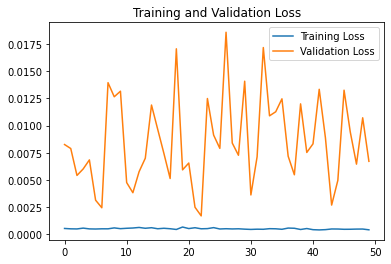

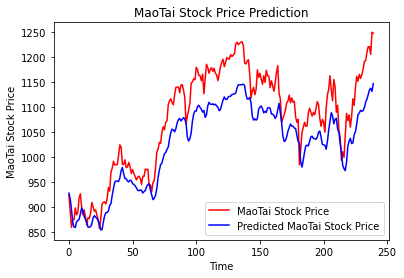

均方误差: 3371.050956
均方根误差: 58.060752
平均绝对误差: 51.867471


In [54]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, LSTM
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

maotai = pd.read_csv('./data/SH600519.csv')  # 读取股票文件

training_set = maotai.iloc[0:2426 - 300, 2:3].values  
# 前(2426-300=2126)天的开盘价作为训练集,表格从0开始计数，
# 2:3 是提取[2:3)列，前闭后开,故提取出C列开盘价
test_set = maotai.iloc[2426 - 300:, 2:3].values  # 后300天的开盘价作为测试集

# 归一化
sc = MinMaxScaler(feature_range=(0, 1))  # 定义归一化：归一化到(0，1)之间
training_set_scaled = sc.fit_transform(training_set)  # 求得训练集的最大值，最小值这些训练集固有的属性，并在训练集上进行归一化
test_set = sc.transform(test_set)  # 利用训练集的属性对测试集进行归一化

x_train = []
y_train = []

x_test = []
y_test = []

# 测试集：csv表格中前2426-300=2126天数据
# 利用for循环，遍历整个训练集，提取训练集中连续60天的开盘价作为输入特征x_train，第61天的数据作为标签，for循环共构建2426-300-60=2066组数据。
for i in range(60, len(training_set_scaled)):
    x_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])
# 对训练集进行打乱
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)
# 将训练集由list格式变为array格式
x_train, y_train = np.array(x_train), np.array(y_train)

# 使x_train符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
# 此处整个数据集送入，送入样本数为x_train.shape[0]即2066组数据；输入60个开盘价，预测出第61天的开盘价，循环核时间展开步数为60; 每个时间步送入的特征是某一天的开盘价，只有1个数据，故每个时间步输入特征个数为1
x_train = np.reshape(x_train, (x_train.shape[0], 60, 1))
# 测试集：csv表格中后300天数据
# 利用for循环，遍历整个测试集，提取测试集中连续60天的开盘价作为输入特征x_train，第61天的数据作为标签，for循环共构建300-60=240组数据。
for i in range(60, len(test_set)):
    x_test.append(test_set[i - 60:i, 0])
    y_test.append(test_set[i, 0])
# 测试集变array并reshape为符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], 60, 1))

model = tf.keras.Sequential([
    LSTM(80, return_sequences=True),
    Dropout(0.2),
    LSTM(100),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mean_squared_error')  # 损失函数用均方误差
# 该应用只观测loss数值，不观测准确率，所以删去metrics选项，一会在每个epoch迭代显示时只显示loss值

checkpoint_save_path = "./checkpoint/LSTM_stock.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='val_loss')

history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])

model.summary()

file = open('./weights/LSTM_stock.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

################## predict ######################
# 测试集输入模型进行预测
predicted_stock_price = model.predict(x_test)
# 对预测数据还原---从（0，1）反归一化到原始范围
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# 对真实数据还原---从（0，1）反归一化到原始范围
real_stock_price = sc.inverse_transform(test_set[60:])
# 画出真实数据和预测数据的对比曲线
plt.plot(real_stock_price, color='red', label='MaoTai Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted MaoTai Stock Price')
plt.title('MaoTai Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MaoTai Stock Price')
plt.legend()
plt.show()

##########evaluate##############
# calculate MSE 均方误差 ---> E[(预测值-真实值)^2] (预测值减真实值求平方后求均值)
mse = mean_squared_error(predicted_stock_price, real_stock_price)
# calculate RMSE 均方根误差--->sqrt[MSE]    (对均方误差开方)
rmse = math.sqrt(mean_squared_error(predicted_stock_price, real_stock_price))
# calculate MAE 平均绝对误差----->E[|预测值-真实值|](预测值减真实值求绝对值后求均值）
mae = mean_absolute_error(predicted_stock_price, real_stock_price)
print('均方误差: %.6f' % mse)
print('均方根误差: %.6f' % rmse)
print('平均绝对误差: %.6f' % mae)

## GRU实现股票预测

在2014年cho等人简化了LSTM结构，提出了GRU网络，GRU使记忆体 $h_t$ 融合了长期记忆和短期记忆，$h_t$ 包含了过去信息 $h_{t-1}$ 和现在信息$\tilde{h}_{t}$，现在信息是过去信息 $h_{t-1}$，过重置门 $r_t$ 与当前输入 $x_t$ 共同决定，两个门限的取值范围也是0到1之间。

<img src="tensorflow2.assets/image-20200601174059946.png" alt="image-20200601174059946" style="zoom:67%;" />

更新门
$$
z_{t}=\sigma\left(W_{z} \cdot\left[h_{t-1}, x_{t}\right]\right)
$$

重置门
$$
r_{t}=\sigma\left(W_{r} \cdot\left[h_{t-1}, x_{t}\right]\right)
$$

记忆体
$$
h_{t}=\left(1-z_{t}\right) * h_{t-1}+z_{t} * \tilde{h}_{t}
$$

候选隐藏层（当前信息）
$$
\tilde{h}_{t}=\tanh \left(W \cdot\left[r_{t} * h_{t-1}, x_{t}\right]\right)
$$

前向传播时，直接使用这个记忆体更新公式，就可以算出每个时刻的 $h_t$ 值了。


### Tensorflow实现

```python
tf.keras.layers.GRU(记忆体个数, return_sequences = 是否返回输出)
```

- return_ sequences=True 各时间步输出 $h_t$
- return_ sequences=False 仅最后时间步输出 $h_t$ (默认)
- 一般最后一层用False，中间层用True

例子

```python
model = tf.keras.Sequential ([
	GRU(80, return_sequences=True),
	Dropout (0.2)，
	GRU(100) 
	Dropout (0.2)，
	Dense (1)
])
```

### 示例

-------------load the model-----------------
Epoch 1/50
33/33 [==============================] - 4s 56ms/step - loss: 4.8261e-04 - val_loss: 0.0055
Epoch 2/50
33/33 [==============================] - 2s 47ms/step - loss: 5.5319e-04 - val_loss: 0.0018
Epoch 3/50
33/33 [==============================] - 2s 47ms/step - loss: 5.2888e-04 - val_loss: 0.0015
Epoch 4/50
33/33 [==============================] - 2s 48ms/step - loss: 6.7544e-04 - val_loss: 0.0034
Epoch 5/50
33/33 [==============================] - 1s 44ms/step - loss: 5.5395e-04 - val_loss: 0.0019
Epoch 6/50
33/33 [==============================] - 1s 44ms/step - loss: 5.2960e-04 - val_loss: 0.0014
Epoch 7/50
33/33 [==============================] - 1s 43ms/step - loss: 5.7619e-04 - val_loss: 0.0014
Epoch 8/50
33/33 [==============================] - 1s 44ms/step - loss: 5.2968e-04 - val_loss: 0.0070
Epoch 9/50
33/33 [==============================] - 1s 44ms/step - loss: 6.6185e-04 - val_loss: 0.0038
Epoch 10/50
33/33 [=========

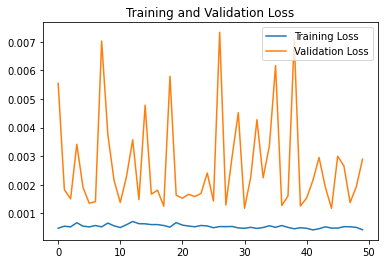

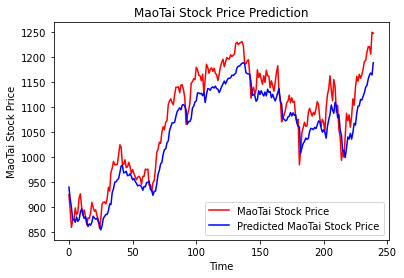

均方误差: 1452.992198
均方根误差: 38.118135
平均绝对误差: 32.996511


In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, GRU
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

maotai = pd.read_csv('data/SH600519.csv')  # 读取股票文件

training_set = maotai.iloc[0:2426 - 300, 2:3].values  # 前(2426-300=2126)天的开盘价作为训练集,表格从0开始计数，2:3 是提取[2:3)列，前闭后开,故提取出C列开盘价
test_set = maotai.iloc[2426 - 300:, 2:3].values  # 后300天的开盘价作为测试集

# 归一化
sc = MinMaxScaler(feature_range=(0, 1))  # 定义归一化：归一化到(0，1)之间
training_set_scaled = sc.fit_transform(training_set)  # 求得训练集的最大值，最小值这些训练集固有的属性，并在训练集上进行归一化
test_set = sc.transform(test_set)  # 利用训练集的属性对测试集进行归一化

x_train = []
y_train = []

x_test = []
y_test = []

# 测试集：csv表格中前2426-300=2126天数据
# 利用for循环，遍历整个训练集，提取训练集中连续60天的开盘价作为输入特征x_train，第61天的数据作为标签，for循环共构建2426-300-60=2066组数据。
for i in range(60, len(training_set_scaled)):
    x_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])
# 对训练集进行打乱
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)
# 将训练集由list格式变为array格式
x_train, y_train = np.array(x_train), np.array(y_train)

# 使x_train符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
# 此处整个数据集送入，送入样本数为x_train.shape[0]即2066组数据；输入60个开盘价，预测出第61天的开盘价，循环核时间展开步数为60; 每个时间步送入的特征是某一天的开盘价，只有1个数据，故每个时间步输入特征个数为1
x_train = np.reshape(x_train, (x_train.shape[0], 60, 1))
# 测试集：csv表格中后300天数据
# 利用for循环，遍历整个测试集，提取测试集中连续60天的开盘价作为输入特征x_train，第61天的数据作为标签，for循环共构建300-60=240组数据。
for i in range(60, len(test_set)):
    x_test.append(test_set[i - 60:i, 0])
    y_test.append(test_set[i, 0])
# 测试集变array并reshape为符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], 60, 1))

model = tf.keras.Sequential([
    GRU(80, return_sequences=True),
    Dropout(0.2),
    GRU(100),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mean_squared_error')  # 损失函数用均方误差
# 该应用只观测loss数值，不观测准确率，所以删去metrics选项，一会在每个epoch迭代显示时只显示loss值

checkpoint_save_path = "./checkpoint/stock.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='val_loss')

history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])

model.summary()

file = open('./weights/GRU_stock.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

################## predict ######################
# 测试集输入模型进行预测
predicted_stock_price = model.predict(x_test)
# 对预测数据还原---从（0，1）反归一化到原始范围
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# 对真实数据还原---从（0，1）反归一化到原始范围
real_stock_price = sc.inverse_transform(test_set[60:])
# 画出真实数据和预测数据的对比曲线
plt.plot(real_stock_price, color='red', label='MaoTai Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted MaoTai Stock Price')
plt.title('MaoTai Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MaoTai Stock Price')
plt.legend()
plt.show()

##########evaluate##############
# calculate MSE 均方误差 ---> E[(预测值-真实值)^2] (预测值减真实值求平方后求均值)
mse = mean_squared_error(predicted_stock_price, real_stock_price)
# calculate RMSE 均方根误差--->sqrt[MSE]    (对均方误差开方)
rmse = math.sqrt(mean_squared_error(predicted_stock_price, real_stock_price))
# calculate MAE 平均绝对误差----->E[|预测值-真实值|](预测值减真实值求绝对值后求均值）
mae = mean_absolute_error(predicted_stock_price, real_stock_price)
print('均方误差: %.6f' % mse)
print('均方根误差: %.6f' % rmse)
print('平均绝对误差: %.6f' % mae)